# Integration with Kidney atlas
Ref: https://www.pnas.org/content/116/39/19619.short


In [2]:
import anndata
import numpy as np 
import pandas as pd
import seaborn as sns 
import scanpy as sc 


import sys

sys.path.append('/mnt/ibm_lg/covid_tissue_atlas/CovidTissueAtlas/cta_utils/')
import utils

/data/alejandro/miniconda3/envs/scanpy/lib/python3.8/site-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  rank_zero_deprecation(


In [3]:
from matplotlib import pyplot as plt
# make sure you use these two parameters before saving figures to pdf
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(dpi=150)

In [3]:
katlas = sc.read_h5ad('/mnt/ibm_lg/achen/covid_tissue_atlas/public_data_files/kidney_snrna_wilson.h5ad')

In [4]:
pwd

'/mnt/ibm_lg/alejandro/covid-tissue-atlas/notebooks/tissue_optimization_notebooks'

In [4]:
katlas

AnnData object with n_obs × n_vars = 19985 × 22357
    obs: 'assay', 'assay_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'donor_age', 'donor_uuid', 'ethnicity', 'ethnicity_ontology_term_id', 'library_uuid', 'sample_preservation_method', 'sample_uuid', 'sex', 'suspension_suspension_type', 'suspension_uuid', 'tissue', 'tissue_ontology_term_id', 'disease', 'disease_ontology_term_id', 'reported_diseases', 'author_cell_type', 'cell_type', 'cell_type_category', 'cell_type_ontology_term_id', 'author_cluster'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'default_embedding', 'default_field', 'layer_descriptions', 'organism', 'organism_ontology_term_id', 'reference_annotation_version', 'title', 'version'
    obsm: 'X_umap'

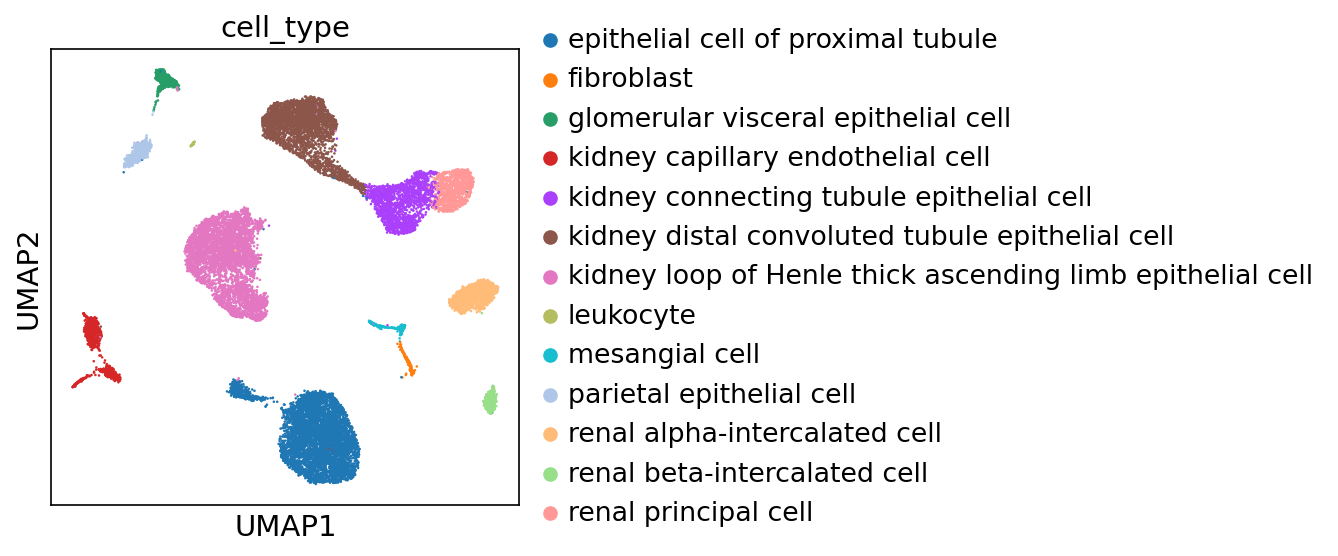

In [5]:
sc.pl.umap(katlas, 
          color = 'cell_type')

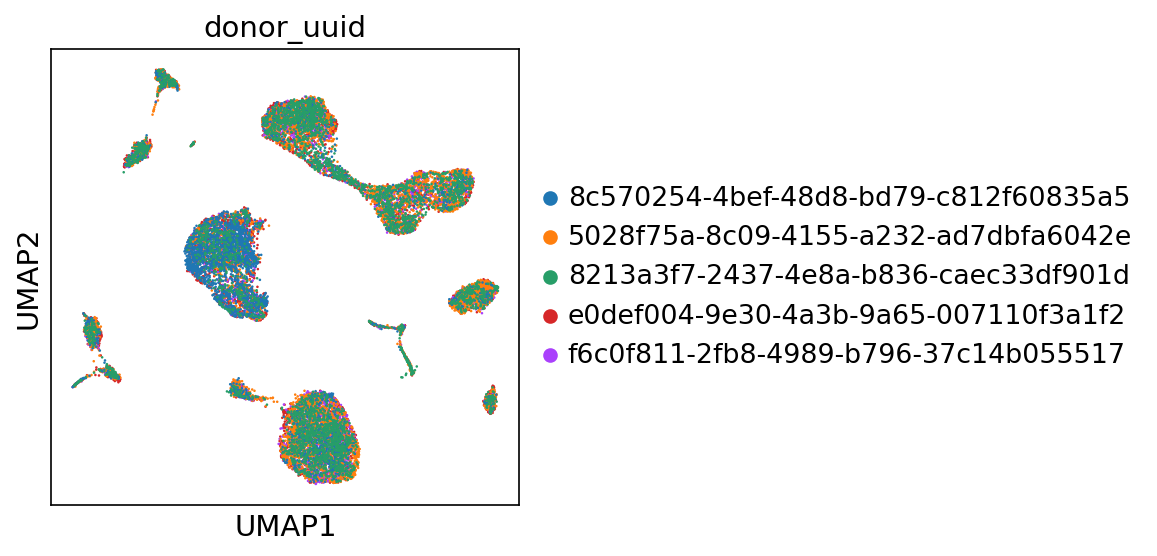

In [6]:
sc.pl.umap(katlas, 
          color ='donor_uuid')

In [7]:
np.min(katlas.raw.X), np.max(katlas.raw.X)

(0.0, 2491.0)

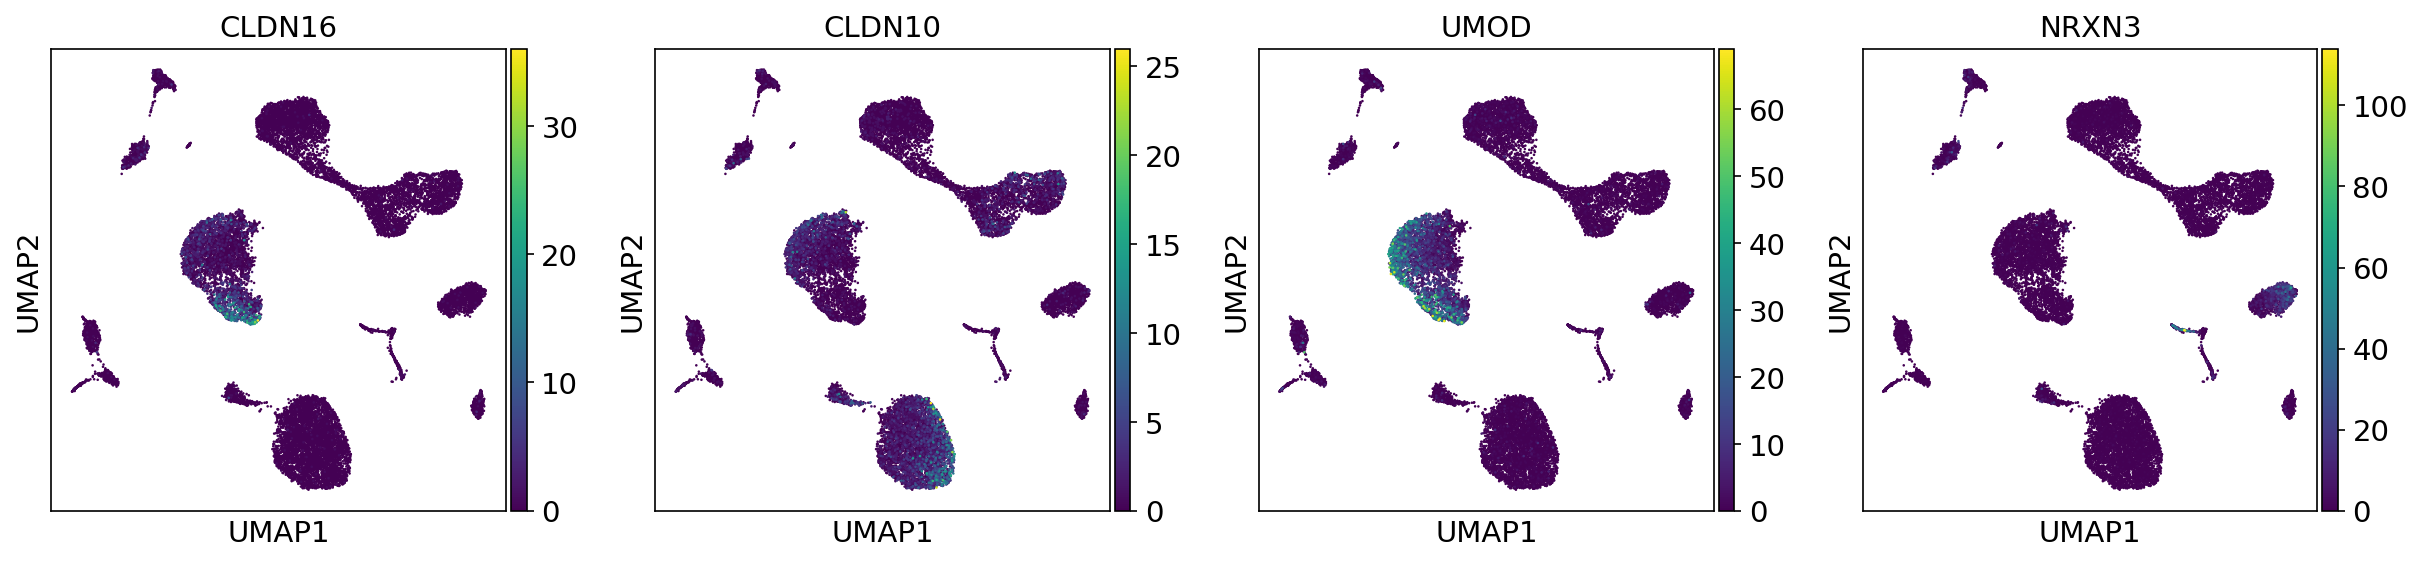

In [8]:
sc.pl.umap(katlas, 
          color=['CLDN16','CLDN10','UMOD','NRXN3'])

In [19]:
adata = anndata.AnnData(X = katlas.raw.X,
                       obs= katlas.obs,
                       var= katlas.raw.var)

In [20]:
adata.layers['counts'] = adata.X 

<AxesSubplot:ylabel='Count'>

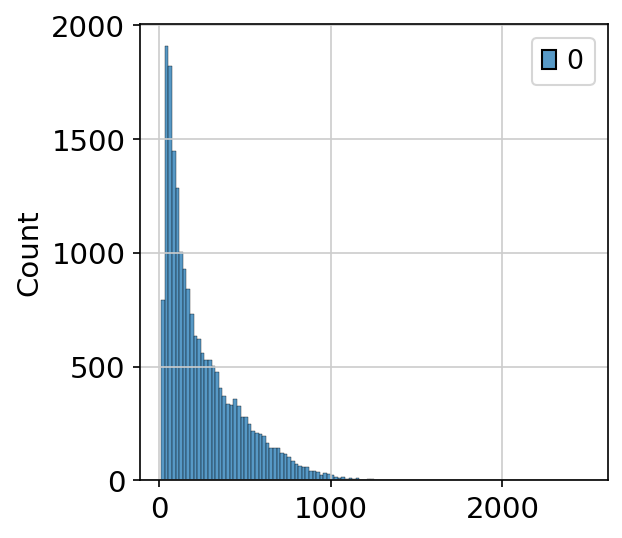

In [21]:
sns.histplot(np.max(adata.layers['counts'], axis = 1).toarray())

# Integration with COVID atlas
Last update: 27th 0ct 2021 <br>


In [12]:
tissue ='kidney'
tissue_objects_path= '/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/kidney'
file_covid_tissue = f'{tissue_objects_path}/{tissue}_cellbender_scvi.h5ad'


adata_covid  = sc.read_h5ad(file_covid_tissue)

In [13]:
adata_covid.obs.head() 

cell_type_annotation  \
index                                                                       
S02_CAACAACAGGAACGTC-1                 epithelial cell of proximal tubule   
S02_CACTGAACACTGGACC-1                 epithelial cell of proximal tubule   
S02_TTCCTTCCAAACCATC-1                               renal principal cell   
S02_CTCCATGGTTGGTGTT-1  kidney loop of henle thick ascending limb epit...   
S02_CTACATTAGCCTATCA-1                               renal principal cell   

                       sample_origin 10X_run leiden disease_status  tissue  \
index                                                                        
S02_CAACAACAGGAACGTC-1    S02_kidney     S02     20          Cov19  kidney   
S02_CACTGAACACTGGACC-1    S02_kidney     S02     20          Cov19  kidney   
S02_TTCCTTCCAAACCATC-1    S02_kidney     S02     17          Cov19  kidney   
S02_CTCCATGGTTGGTGTT-1    S02_kidney     S02     17          Cov19  kidney   
S02_CTACATTAGCCTATCA-1    S02_kidney     S02     17          Cov19  kidney   

                       batch   race  age    source sex  \
index                                                    
S02_CAACAACAGGAACGTC-1     0  White   74  Saarland   F   
S02_CACTGAACACTGGACC-1     0  White   74  Saarland   F   
S02_TTCCTTCCAAACCATC-1     0  White   74  Saarland   F   
S02_CTCCATGGTTGGTGTT-1     0  White   74  Saarland   F   
S02_CTACATTAGCCTATCA-1     0  White   74  Saarland   F   

                        test_positive_hrs_before_death  cell_class  \
index                                                                
S02_CAACAACAGGAACGTC-1                            24.0  epithelial   
S02_CACTGAACACTGGACC-1                            24.0  epithelial   
S02_TTCCTTCCAAACCATC-1                            24.0  epithelial   
S02_CTCCATGGTTGGTGTT-1                            24.0  epithelial   
S02_CTACATTAGCCTATCA-1                            24.0  epithelial   

                                                      cell_ontology_class  
index                                                                      
S02_CAACAACAGGAACGTC-1                 epithelial cell of proximal tubule  
S02_CACTGAACACTGGACC-1                 epithelial cell of proximal tubule  
S02_TTCCTTCCAAACCATC-1                               renal principal cell  
S02_CTCCATGGTTGGTGTT-1  kidney loop of henle thick ascending limb epit...  
S02_CTACATTAGCCTATCA-1                               renal principal cell

In [22]:
adata.obs['disease_status'] ="Control"
adata.obs['10X_run'] = adata.obs['donor_uuid']
adata.obs['source'] = 'kidney_atlas'


In [14]:
adata_covid.obs['cell_type'] =""
adata_covid.obs['source'] ="COVID_atlas"

In [15]:
np.min(adata_covid.layers['counts']), np.max(adata_covid.layers['counts'])

(0.0, 851.0)

In [16]:
adata_covid.layers['counts']

<7880x33567 sparse matrix of type '<class 'numpy.float32'>'
	with 5414441 stored elements in Compressed Sparse Row format>

... storing 'cell_type' as categorical
... storing 'source' as categorical


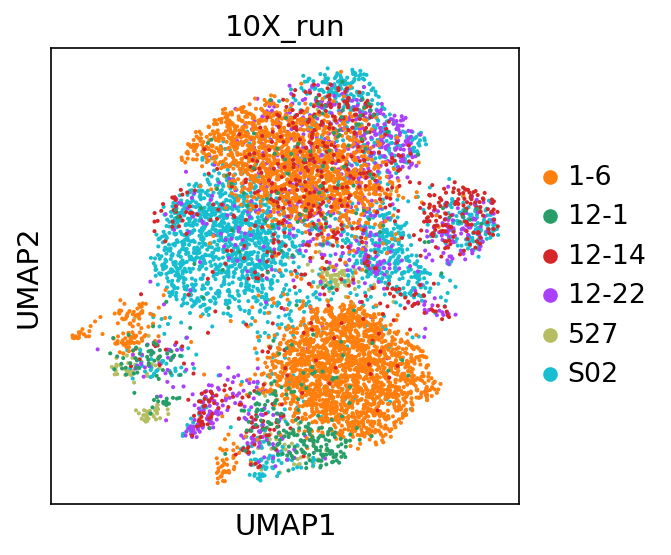

In [17]:
sc.pl.umap(adata_covid,color='10X_run')

In [96]:
np.max(adata_covid.layers['counts'], axis = 1).toarray() 

array([[ 56.],
       [109.],
       [ 62.],
       ...,
       [ 22.],
       [  8.],
       [  6.]], dtype=float32)

In [25]:
def concat_2anndata(adata1,adata2):
    min_cols = list(set(adata1.obs.columns) & set(adata2.obs.columns))
    min_vars = list(set(adata1.var.columns) & set(adata2.var.columns))


    adata = anndata.AnnData(X = adata1.layers['counts'],
                       obs= adata1.obs[min_cols],
                       var= adata1.var[min_vars])


    adataaux = anndata.AnnData(X = adata2.layers['counts'],
                              obs = adata2.obs[min_cols],
                              var = adata2.var[min_vars])

    adata = adata.concatenate(adataaux, join='inner',index_unique = None)

    return adata

In [20]:
kidney = concat_2anndata(adata, adata_covid)

In [21]:
kidney

AnnData object with n_obs × n_vars = 27865 × 33514
    obs: 'disease_status', 'source', '10X_run', 'cell_type', 'tissue', 'batch'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'gene_ids-1', 'genome-1'

In [22]:
kidney.layers['counts'] = kidney.X

In [23]:
#SCVI preprocessing
# normalize data
adata = kidney.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe

# For batch correction: Filter samples that have less than 200 cells
sample_id = '10X_run' # decontX object
sample_size = adata.obs[sample_id].value_counts()
large_samples = sample_size[sample_size>200].reset_index()['index'].astype(str)

adata = adata[adata.obs[sample_id].isin(large_samples)].copy()

normalizing counts per cell
    finished (0:00:00)


## SCVI

In [24]:
# Train SCVI
import scvi

n_layers=2
n_latent=100
scvi.data.setup_anndata(adata, layer="counts", batch_key=sample_id)
vae = scvi.model.SCVI(adata, n_layers=n_layers, n_latent=n_latent)

# takes about 40 min
vae.train()

adata.obsm["X_scVI"] = vae.get_latent_representation() 

INFO     Using batches from adata.obs["10X_run"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 27675 cells, 33514 vars, 10       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 289/289: 100%|██████████| 289/289 [17:41<00:00,  3.67s/it, loss=4.34e+03, v_num=1]


In [30]:
adata = utils.compute_neighbors(adata, use_rep='X_scVI')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


In [31]:
adata.obs["celltype_scanvi"] = 'Unknown'
ss2_idx = adata.obs['source'] == "kidney_atlas"
adata.obs["celltype_scanvi"][ss2_idx] = adata.obs.cell_type[ss2_idx]

<ipython-input-31-b68504fee4a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["celltype_scanvi"][ss2_idx] = adata.obs.cell_type[ss2_idx]


... storing 'celltype_scanvi' as categorical


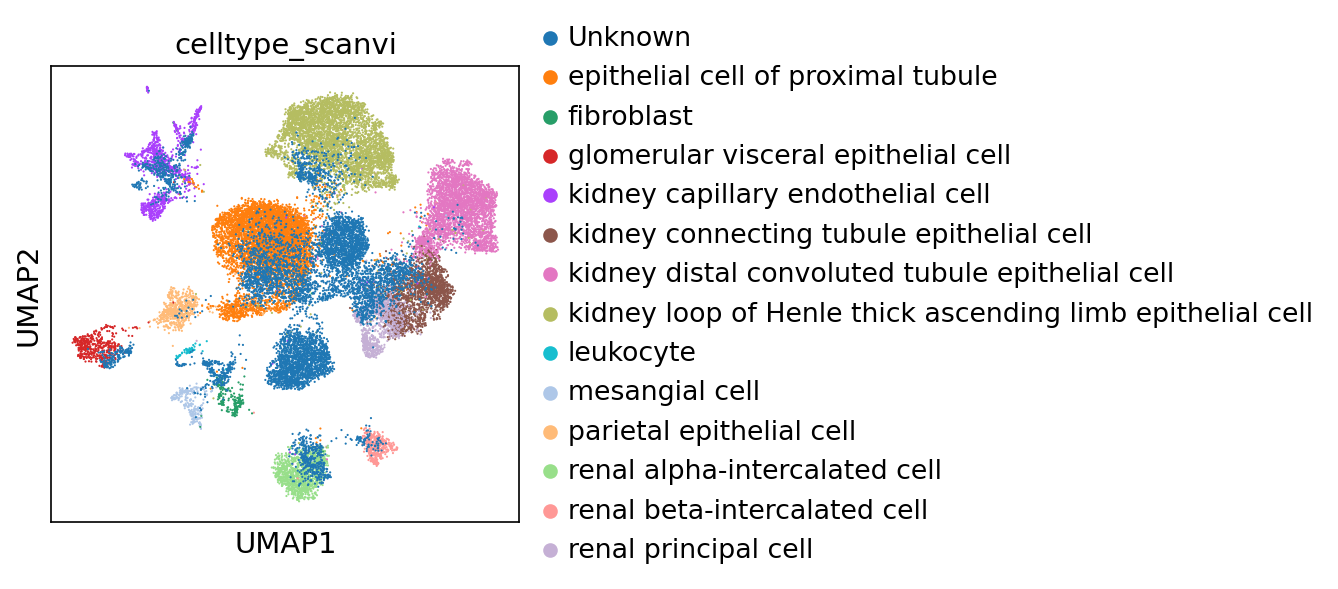

In [32]:
color_by ='celltype_scanvi'
sc.pl.umap(
    adata,
    color=[color_by]
)
#plt.sa

In [33]:
adata.obs["celltype_scanvi"].value_counts() 


Unknown                                                      7690
epithelial cell of proximal tubule                           5485
kidney loop of Henle thick ascending limb epithelial cell    4435
kidney distal convoluted tubule epithelial cell              3250
kidney connecting tubule epithelial cell                     1805
renal alpha-intercalated cell                                1107
renal principal cell                                         1022
kidney capillary endothelial cell                            1008
parietal epithelial cell                                      552
glomerular visceral epithelial cell                           463
renal beta-intercalated cell                                  349
mesangial cell                                                239
fibroblast                                                    207
leukocyte                                                      63
Name: celltype_scanvi, dtype: int64

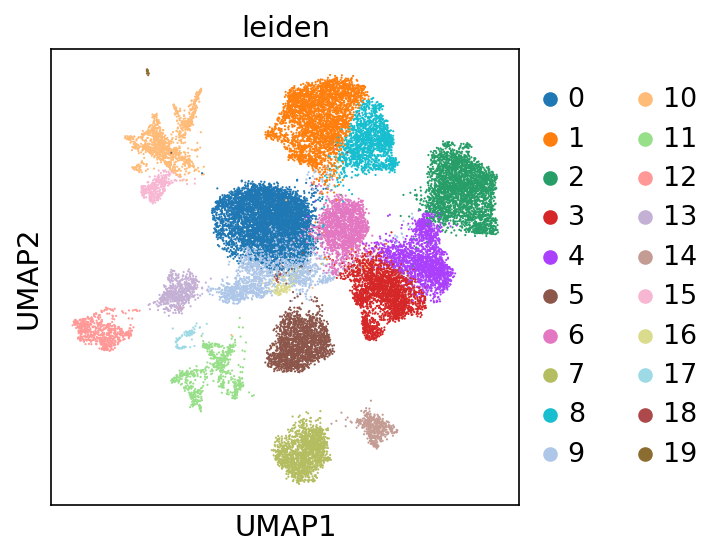

In [34]:
sc.pl.umap(adata, color ='leiden')

In [38]:
adata_fil = adata[~adata.obs['leiden'].isin(['5','6']),:].copy()

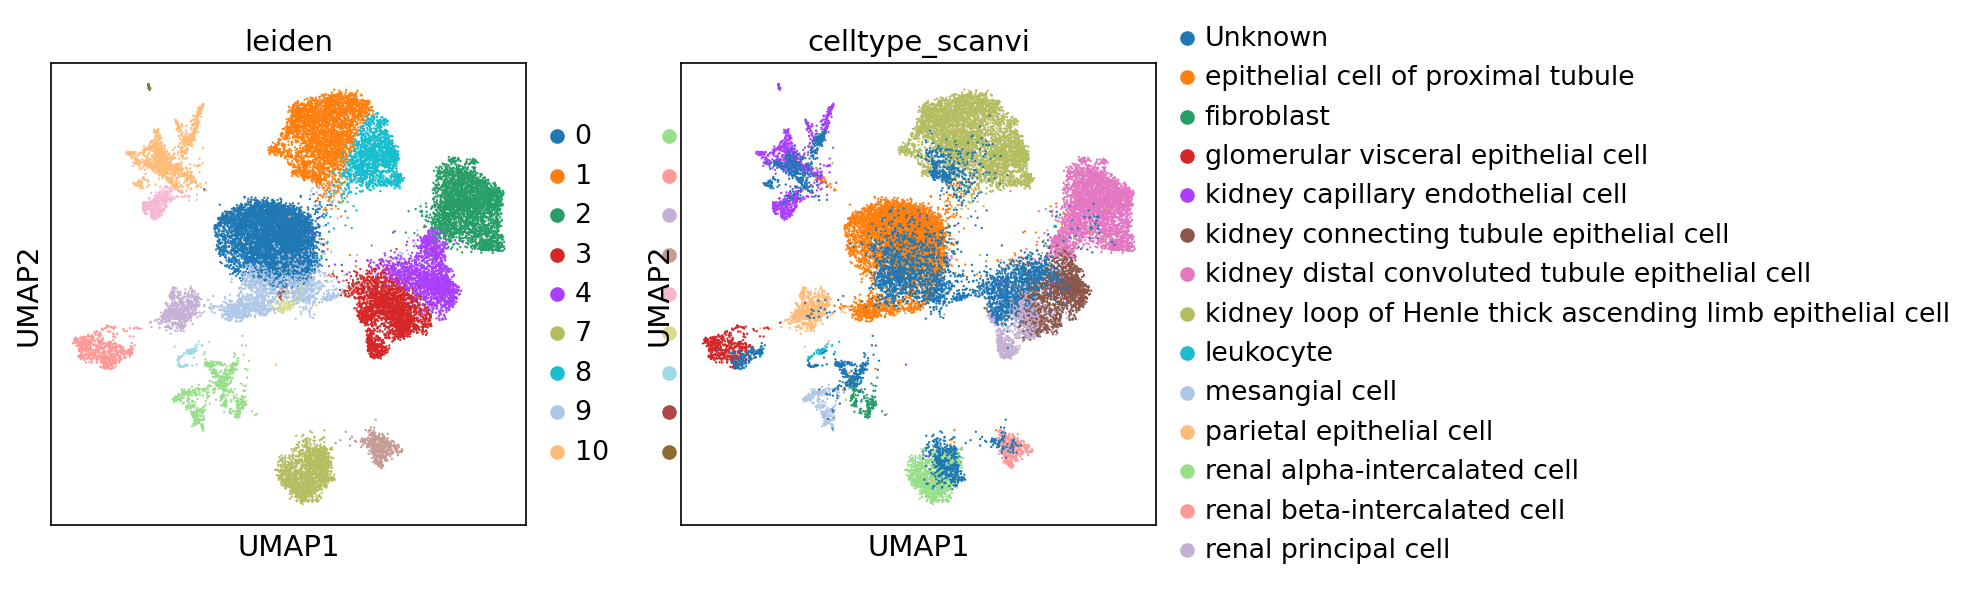

In [39]:
sc.pl.umap(adata_fil, color =['leiden','celltype_scanvi'])

## Run SCVI after cleaning up 

In [40]:
n_layers=2
n_latent=100
scvi.data.setup_anndata(adata_fil, layer="counts", batch_key=sample_id)
vae = scvi.model.SCVI(adata_fil, n_layers=n_layers, n_latent=n_latent)

vae.train()



INFO     Using batches from adata.obs["10X_run"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 24174 cells, 33514 vars, 10       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 331/331: 100%|██████████| 331/331 [18:47<00:00,  3.41s/it, loss=4.65e+03, v_num=1]


In [42]:
adata_fil.obsm["X_scVI"] = vae.get_latent_representation() 
adata_fil = utils.compute_neighbors(adata_fil, use_rep='X_scVI')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


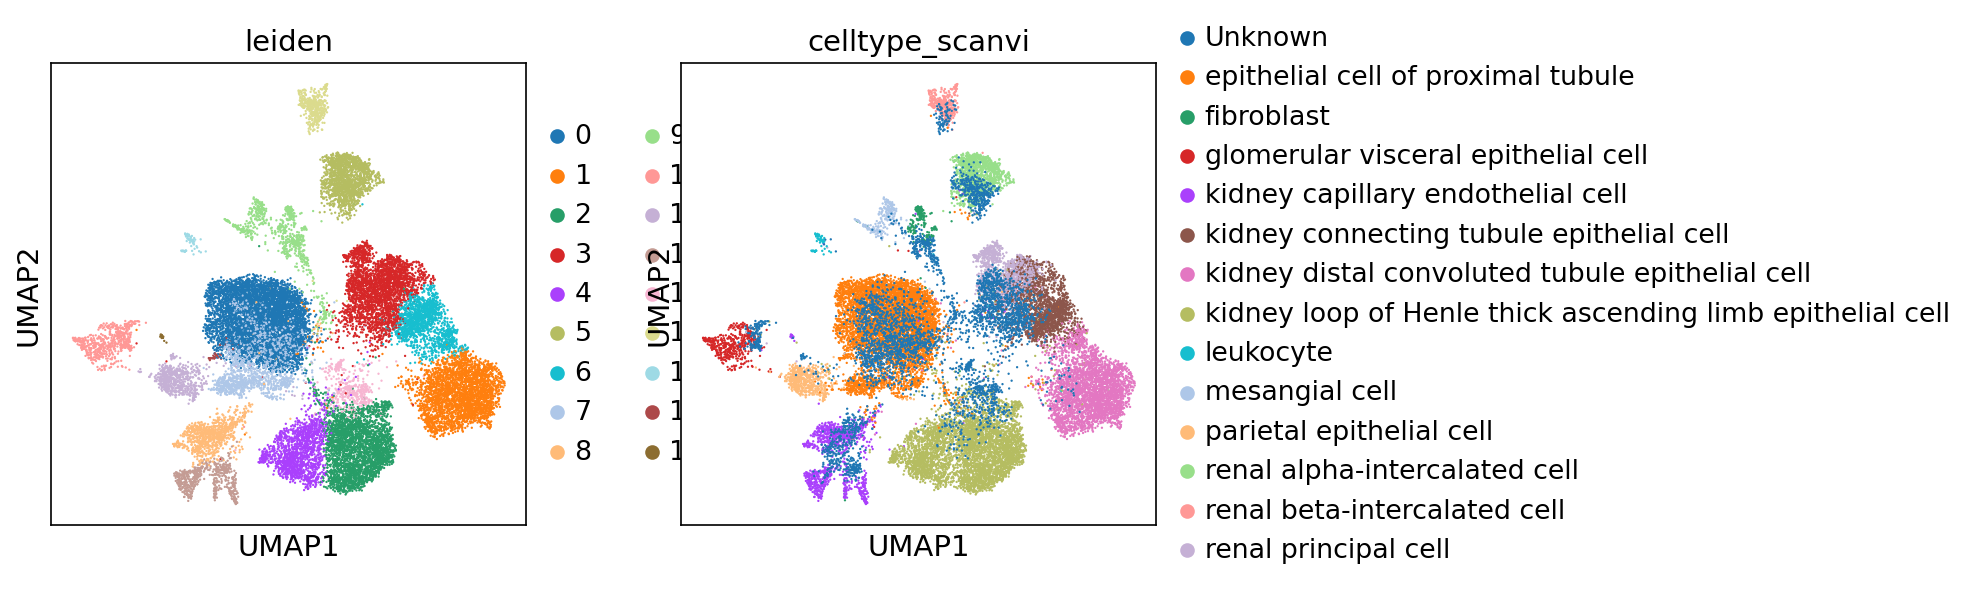

In [43]:
sc.pl.umap(adata_fil, color =['leiden','celltype_scanvi'])

## Label transfer SCANVI

In [44]:
scvi.data.setup_anndata(
    adata_fil,
    layer="counts",
    batch_key=sample_id,
    labels_key="celltype_scanvi",
)

INFO     Using batches from adata.obs["10X_run"]                                             
INFO     Using labels from adata.obs["celltype_scanvi"]                                      
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 24174 cells, 33514 vars, 10       
         batches, 14 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [45]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, "Unknown", adata=adata_fil)


In [46]:
lvae.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 7 epochs.                                                              


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 7/7: 100%|██████████| 7/7 [00:43<00:00,  6.27s/it, loss=4.73e+03, v_num=1]


In [48]:
adata_fil.obs["C_scANVI"] = lvae.predict(adata_fil)
adata_fil.obsm["X_scANVI"] = lvae.get_latent_representation(adata_fil)

In [49]:
sc.pp.neighbors(adata_fil, use_rep="X_scANVI")
sc.tl.umap(adata_fil)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


... storing 'C_scANVI' as categorical


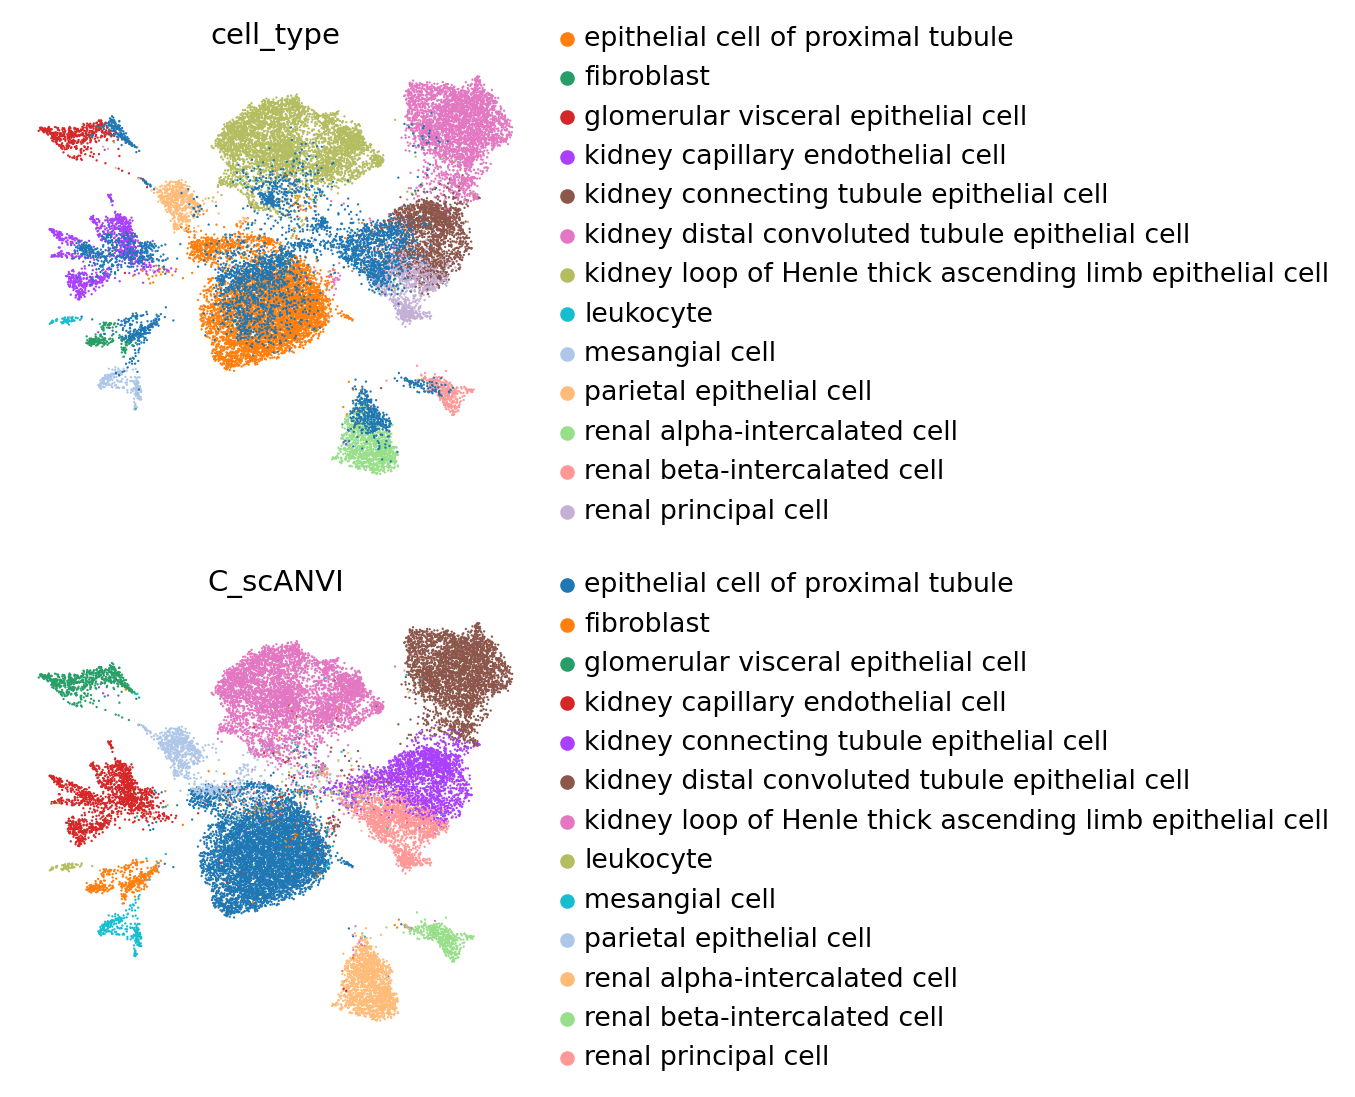

In [50]:

sc.pl.umap(adata_fil, color=["cell_type", "C_scANVI"], ncols=1, frameon=False)

In [52]:
adata_fil.obs.source.value_counts()

kidney_atlas    19941
COVID_atlas      4233
Name: source, dtype: int64

In [55]:
def get_markers(tissue):
    all_markers = {
            'prostate': {'luminal': ['KLK3','NKX3-1','ACPP','KRT8'],
                            'basal': ['KRT5','NOTCH4','TP63','DST'],
                            'endothelial':['VWF','PECAM1','SELE'],
                            'smooth_muscle':['ACTA2', 'MYH11', 'TPM2'],
                            'fibroblast':['DCN', 'C7', 'PDGFRA']            },
            'liver': {  'hepatocyte': ['ALB', 'APOA1', 'HAL', 'SDS','HAMP'],
                            'stromal': ['ACTA2', 'COL1A1', 'DCN', 'COLEC11', 'SPARC'],
                            'endothelium': ['PECAM1', 'CLEC4G', 'CLEC4M', 'FLT4','FCGR2B'],
                            'smooth_muscle':['ACTA2', 'MYH11', 'CNN1', 'TAGLN'],
                            'kupffer':['CLEC4F', 'CD5L', 'VSIG4',  'MST1R', 'MAFB'],
                            'nk_cells': ['PTPRC', 'KLRB1', 'KLRF1', 'GZMA']},
            'colon':{'epithelial': ['LGR5', 'ALPI', 'CHGA', 'DCLK1'],
                        'endothelial': ['VWF', 'NOTCH1', 'ACKR1', 'LYVE1'],
                       'stroma': ['CNN1', 'ACTA2', 'TAGLN', 'NOTCH3'],
                       'immune': ['JCHAIN', 'MZB1', 'XBP1', 'TNFRSF17']},
            'heart':{'endothelium':['VWF', 'PECAM1', 'CDH5'],
                       'cardiac muscle cell': ['TNNT2', 'TNNI1', 'TNNI3', 'ACTC1'],
                        'cardiac fibroblast': ['DCN', 'LUM', 'PDGFRA'],
                        'smooth muscle cell': ['MYH11', 'TAGLN', 'ACTA2', 'CNN1', 'RGS5', 'AGT', 'CSPG4'],
                       'macrophage': ['CD163', 'PTPRC', 'MARCO', 'FCGR3A'],
                       'T-cell CD8': ['CD8A', 'IL7R', 'PTPRC']},
            'lung': {'alveolar epithelial type 1 cell': ['AGER', 'PDPN', 'CLIC5'],
                       'alveolar epithelial type 2 cell': ['SFTPB', 'SFTPC', 'SFTPD', 'MUC1', 'ETV5'],
                       'capillary cell': ['CA4'],
                       'macrophage': ['MARCO', 'MSR1', 'MRC1']},
            'kidney':{'proximal convoluted tubule cell (PCT)': ['CUBN', 'SLC4A4', 'SLC34A1', 'MIOX'],
                         'alpha':['SLC4A1','OXGR1','ATP6AP2'],
                         'ascending limb of loop of Henle cell (LHA)':['SPP1', 'SLC12A1', 'UMOD'],
                         'distal convoluted tubule cell (DCT)': ['SLC12A3', 'WNK1', 'WNK4', 'SLC12A1'] ,
                         'B cell' : ['CD79A', 'CD24', 'MS4A1', 'CD19'] ,
                        'stromal podocyte':['TJP1', 'WT1', 'NPHS1', 'NPHS2', 'THSD7A', 'SYNPO', 'CD2AP', 'COL4A3', 'GOLIM4', 'PODXL', 'PTPRO', 'FOXD1'],
                        'endothelial': ['GJA4','BMX','ACKR1','AQP1','PROX1', 'FLT4', 'CA4','PDPN','PECAM1','CD34','VWF']},
             'kidney_lemur':{'glomerular endothelial cell' : ['EHD3','F8','KDR','GATA5'],
                             'vasa recta ascending limb cell' : ['PLVAP','VCAM1','LYVE1','ACKR1','GPM6A','SELP','FLT4'],
                             'vasa recta descending limb cell' : ['CLDN5','SOX17','SLC14A1','SEMA3G','AQP1','PALMD','ADAM15'],
                             'proximal convoluted tubule epithelial' : ['AQP1','ENPEP','CUBN','SLC4A4','SLC3A1','MIOX','SLC22A8','SLC16A9',
                                                                                  'PCK1','PAH','SLC13A3','SLC34A1','GPX3','SLC17A3',
                                                                                  'SLC5A2','SLC5A12'],
                             'proximal straight tubule epithelial' : ['AQP1','ENPEP','CUBN','SLC4A4','SLC3A1','MIOX','SLC22A8',
                                                                                'SLC16A9','PCK1','PAH','SLC13A3','SLC34A1','GPX3',
                                                                                'SLC17A3','ATP11A'],
                             'loop of Henle thin descending limb epithelial': ['AQP1','ENPEP','SPP1'],
                             'loop of Henle thin ascending limb epithelial': ['SLC12A1','UMOD','KNG1','SPP1'],
                             'loop of Henle thick ascending limb epithelial': ['WNK1','WNK4','SLC12A1','UMOD','KNG1','PPP1R1A','CLDN16','SPP1'],
                             'distal convoluted tubule epithelial': ['CALB1','SLC12A3','WNK1','WNK4','SLC8A1','LHX1','GATA3','AVPR2'],
                             'renal alpha-intercalated cell': ['ATP6V1G3','ATP6V0D2','TMEM213','ATP6AP2','AVPR1A','SLC4A1','OXGR1','SLC26A7','DMRT2','KIT'],
                             'renal beta-intercalated cell':['ATP6V1G3','ATP6V0D2','TMEM213','ATP6AP2','AVPR1A','SLC26A4','INSRR','TLDC2'],
                             'renal principal cell': ['AQP2','CALB1','GATA3','AVPR2','TRPV5','FXYD4','SCNN1B'],
                             'macula densa epithelial cell': ['WNK1','WNK4','SLC12A1','KNG1','SLC9A2','PTGS2','NOS1','AVPR1A'],
                             'podocyte': ['WT1','CDKN1C','NPHS1','NPHS2','PTPRO','MAFB','COL4A3','FOXD1','PODXL','SYNPO'],
                             'urothelial cell':['S100P','UPK1A','UPK1B','KRT5','TP63','UPK3B']}
    }   
              

    return all_markers[tissue]


         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:41)
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: glomerular endothelial cell, vasa recta ascending limb cell, vasa recta descending limb cell, etc.


{'mainplot_ax': <AxesSubplot:>,
 'group_extra_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'cellbender'}>}

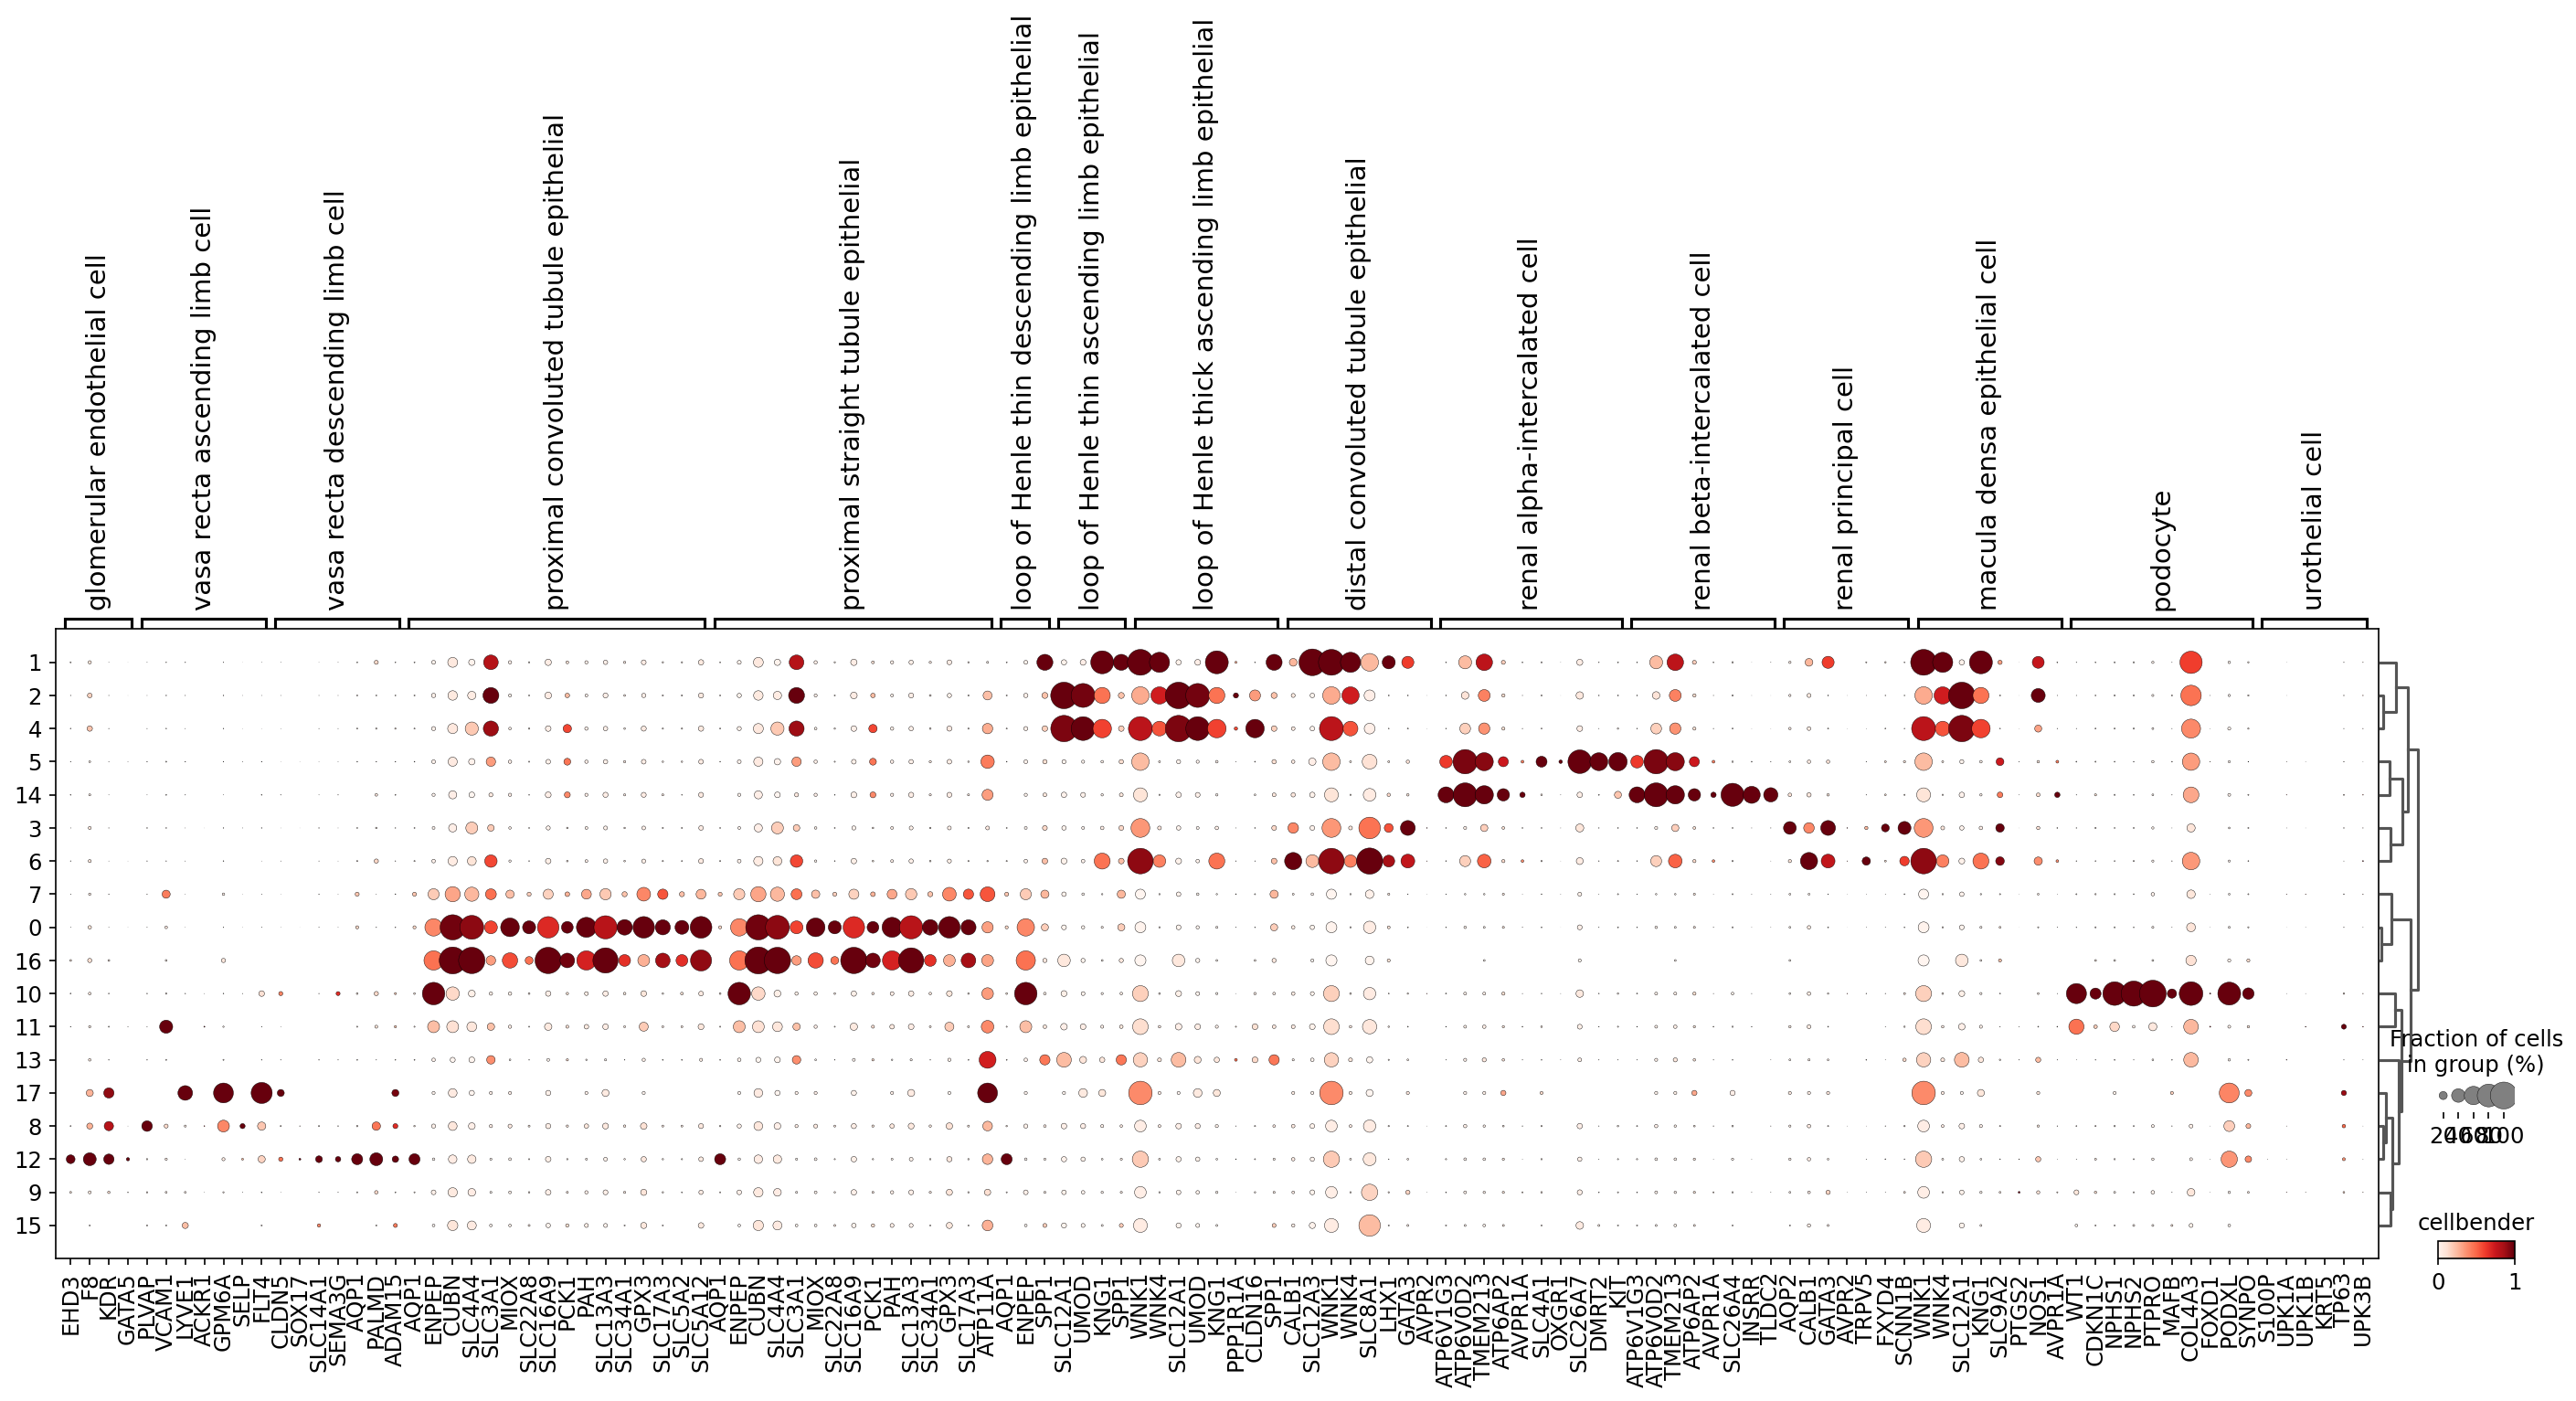

In [66]:

fig, (ax1) = plt.subplots(1, 1, figsize=(23,7), gridspec_kw={'wspace':0.9})

sc.pl.dotplot(adata_fil, 
              var_names= get_markers('kidney_lemur'), 
              layer='counts',
              groupby='leiden',
              log=True,
              standard_scale='var',
              colorbar_title = 'cellbender',
              dendrogram=True, ax = ax1, show = False)

## Kidney markers

In [67]:
sc.tl.rank_genes_groups(adata_fil, groupby = 'leiden', method = 'wilcoxon')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:04)


In [68]:
pd.DataFrame(adata_fil.uns['rank_genes_groups']['names']).head(25)

0           1           2            3          4          5  \
0       ACSM2B     SLC12A3     SLC12A1        PDE4D    SLC12A1       CLNK   
1       ACSM2A       TRPM7       PLCB1         KAZN       CASR     ADGRF5   
2         CUBN       CNNM2        UMOD   AC019197.1      PLCB1      MAGI1   
3    RAB11FIP3  AC078980.1         RP1        GRIP1       UMOD      PACRG   
4         LRP2         EGF       ERBB4        MECOM        RP1   ATP6V0D2   
5      SLC13A3       RNPC3        GPC5       BMPR1B       HIP1    SLC26A7   
6       SLC4A4       KANK1    CACNA2D3       CADPS2     CCSER1      PDE1C   
7        PDZD2        FMN1      CCSER1      PIK3C2G      PDE1A    GALNT17   
8   AC096577.1     TMEM52B  CLDN10-AS1        GLIS3      ERBB4      ITGA6   
9      SLC5A12        WNK1     PHACTR1       PRKAG2      CGNL1     PTGER3   
10     SLC17A1       KLHL3         EGF       KCNIP4      ENOX1      SLIT2   
11     SLC22A6       APBB2       CLCN5       COBLL1   CACNA2D3  LINC01187   
12      PRODH2       ABCA5         GP2       SLC8A1      PRKD1      SNTB1   
13     SLC16A9       MAML2       PDE1A        RBPMS        GP2    TMEM117   
14        FTCD        KNG1  AC092078.2        AGBL4    TMEM207      RCAN2   
15        GPX3       ESRRG      ATP1B1          TOX     ATP1B1   ATP6V1C2   
16         MME       CPEB4      KLHL13  ADAMTS9-AS2     HS6ST2      ABCC4   
17       PTH2R       TRPM6        HIP1     C11orf80     CLDN16     CACNB2   
18         PAH       CADM1        CASR       SCNN1G    ARHGAP6      NRXN3   
19     SLC6A13      CACNB4   LINC01606       CRYBG1       GPC5   ARHGAP18   
20       AGXT2     TSC22D2      RBFOX1        PAPPA  LINC01606       PSD3   
21       PTH1R     ARHGAP6       PCDH9         PAX8  LINC01762      NXPH2   
22      SLC2A9     ZNF385D       SGIP1        DCDC2      CLCN5     MPPED2   
23       TINAG   LINC01762       ESRRB        PWRN1       LMO7      FOXP1   
24     L3MBTL4        ICA1     RHOBTB3        TRPM3      PCDH9    TMEM101   

             6           7           8        9          10          11  \
0       SLC8A1        LRP2        LDB2    CALD1       MAGI2     ALDH1A2   
1   AC019197.1        PAX8        FLT1  CACNA1C       PTPRO         CFH   
2    LINC01099       SYNE2       PTPRB    PRKG1       PTPRQ   LINC01435   
3       NFE2L2      AKAP12       MEIS2     EBF1      PLA2R1      FRMD4A   
4      PIK3C2G      PRUNE2        EMCN    SLIT3       CLIC5       ZFPM2   
5        TEX41       ITGB8       PTPRM    MEIS2  ST6GALNAC3       SYNE1   
6        PDE4D        RHEX  ST6GALNAC3     DLC1       NPHS2       KCNT2   
7        ARL15     COL27A1        ZEB1    MEIS1       NTNG1        RERG   
8        PRKG1       ALPK2       EPAS1    PDE3A       NPAS3     OSBPL10   
9       COBLL1      ACSM2A      PECAM1     SOX5        NEBL       FBXL7   
10     HSD11B2        CDH6       ASAP1    TMTC1       PLCE1    ARHGAP10   
11        TOX3       BICC1     PITPNC1    CARMN        DPP6       DUSP1   
12        WNK1       PTH2R         TEK    FBXL7       NPHS1       TSHZ2   
13      CADPS2      IL17RB     SLCO2A1    RBMS3      PARD3B       SLIT3   
14       SCN2A       PTPRD      SH3RF3    KALRN      ATP10A        RHEX   
15       NR3C2     PPFIBP1       DOCK4    TIMP3      SEMA5A       NEDD9   
16    B4GALNT3      DLGAP1       KALRN      A2M        FMN2       TENM3   
17       MECOM    TMEM178B        TCF4     ZEB1       DACH1       PDE1A   
18      RAD51B      SLC2A9     RAPGEF4    NTRK3       PODXL        TPM1   
19       FHOD3      ACSM2B       EGFL7    ITGA1      IQGAP2     CTTNBP2   
20    C15orf53     SLC17A1       PLPP1    LTBP1       NFASC       BICD1   
21        RGS6  AC012593.1       TACC1    LAMA2         DST       AUTS2   
22     DPY19L2       STOX2    ARHGAP26    MSRB3        FGF1     KIRREL3   
23     TMEM52B      ATP11A      RASAL2     AFF3       VTI1A  AC068234.1   
24       GRIP1        INSR       ELMO1     GRK5    ADAMTS19       MAGI2   

            12           13         14        15          1

In [59]:
louvain_degs = pd.DataFrame(adata_fil.uns['rank_genes_groups']['names'])
#louvain_degs.to_csv(data_directory + '/' + sample_name + '-leiden-degs.csv')

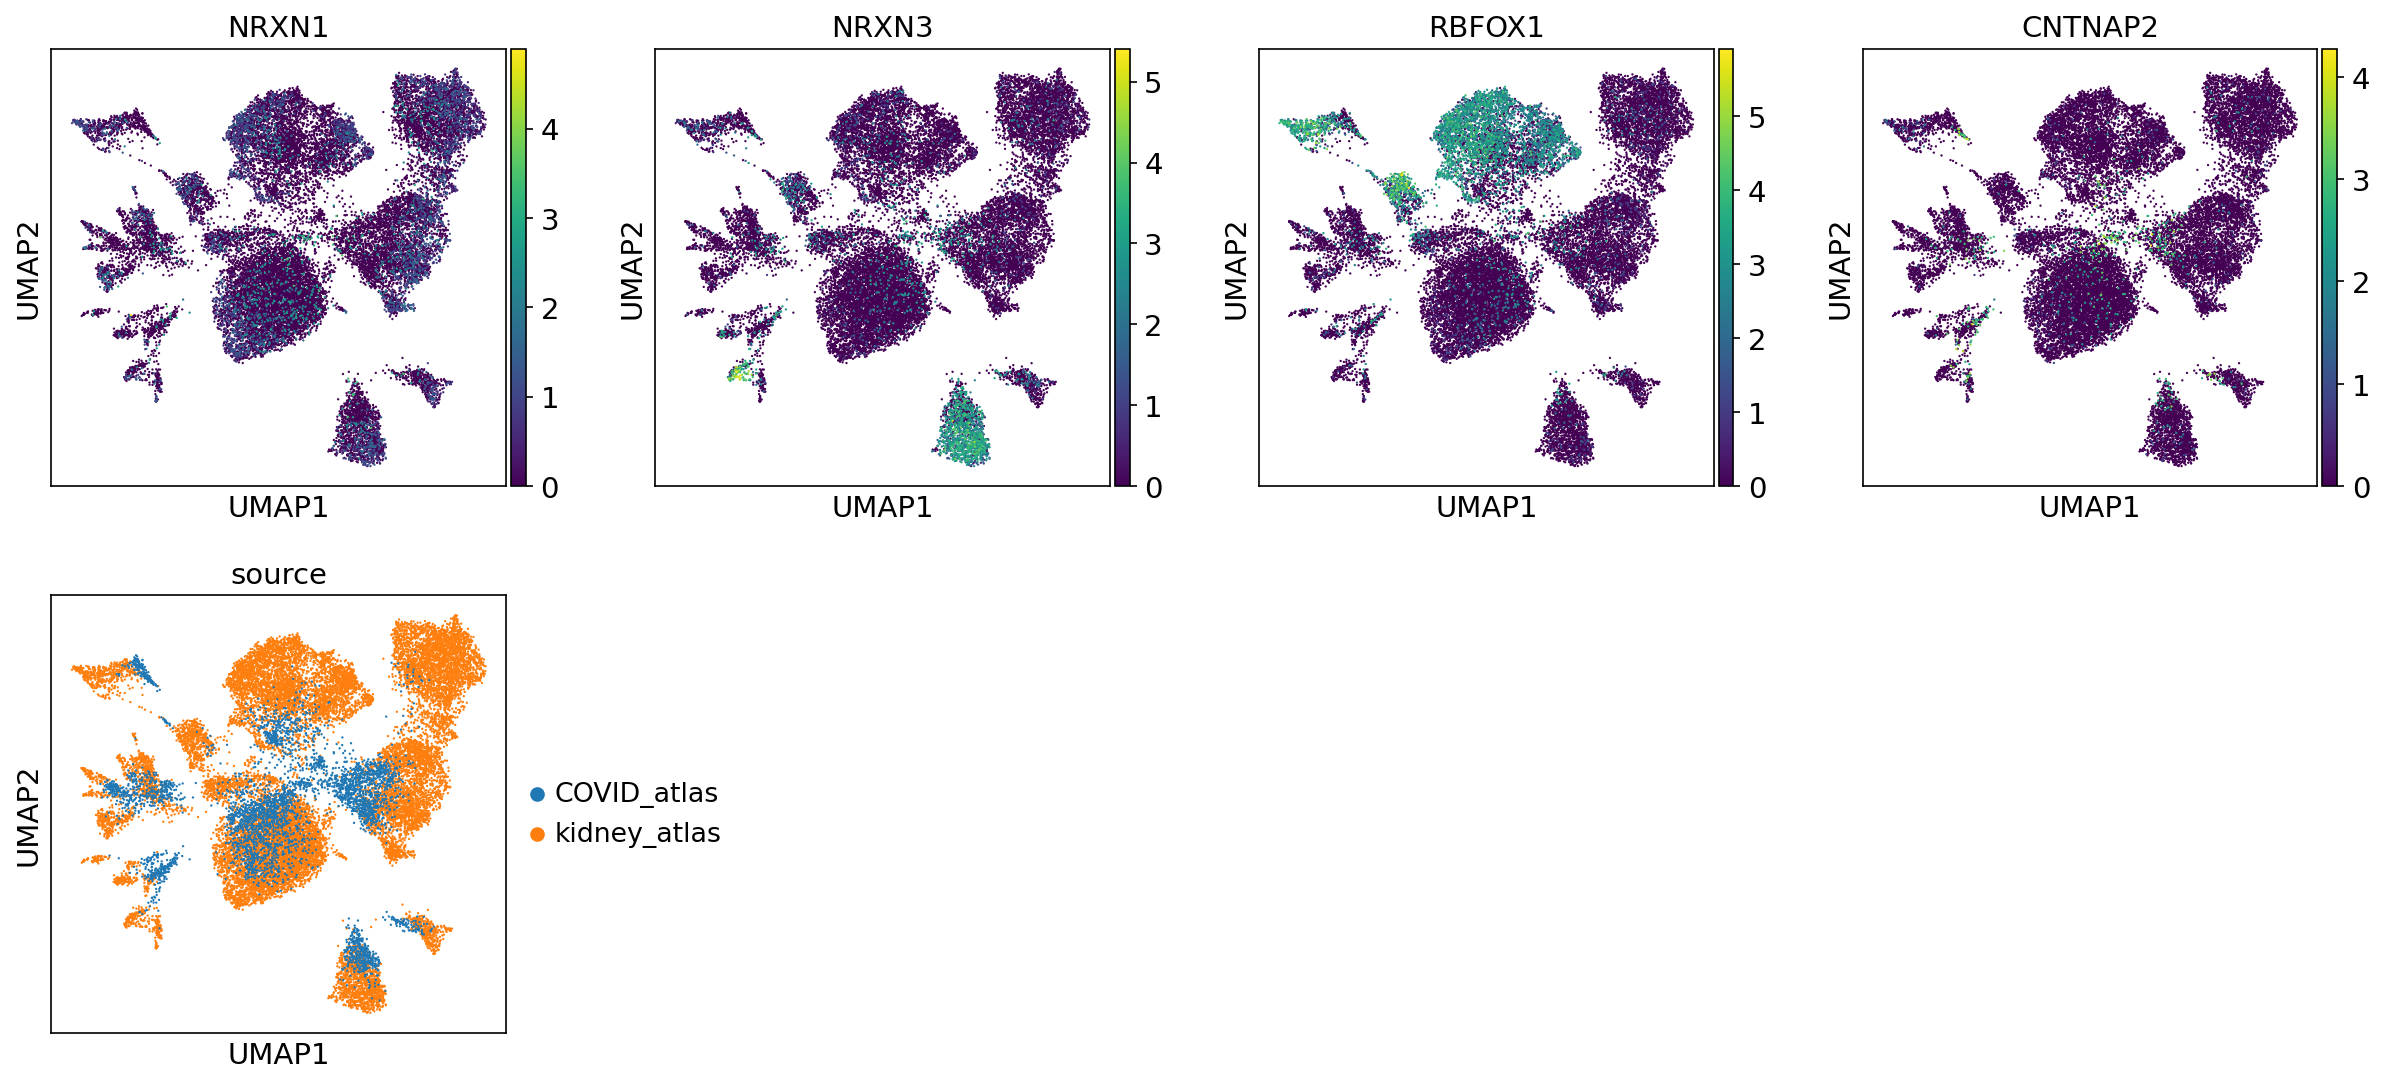

In [95]:
sc.pl.umap(adata_fil, color=['NRXN1', 'NRXN3','RBFOX1','CNTNAP2','source'])

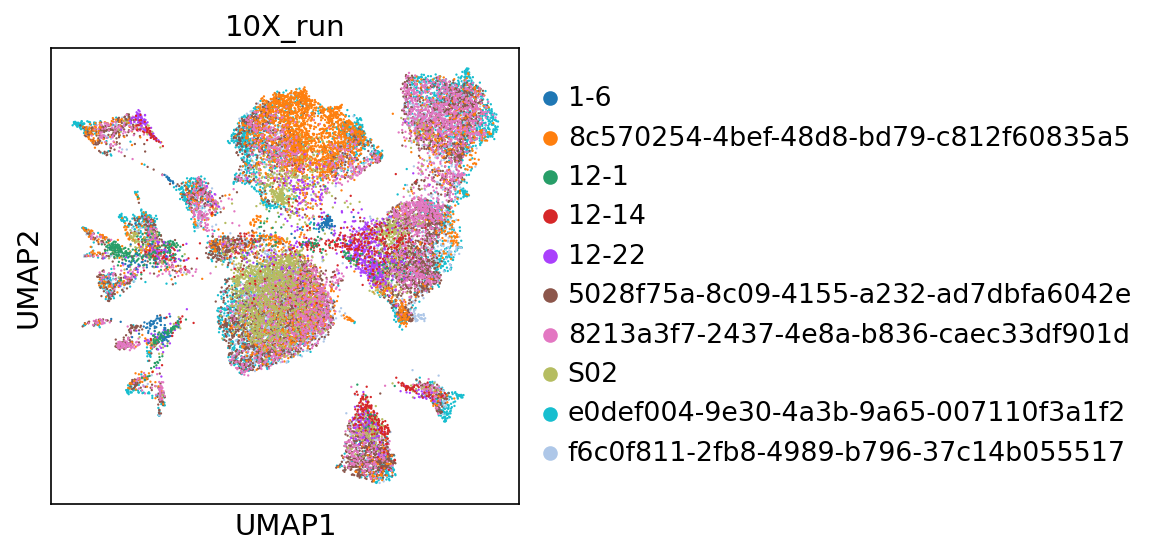

In [93]:
sc.pl.umap(adata_fil,
          color='10X_run')

In [71]:
n_cells = adata.X.shape[0]
n_cells

24174

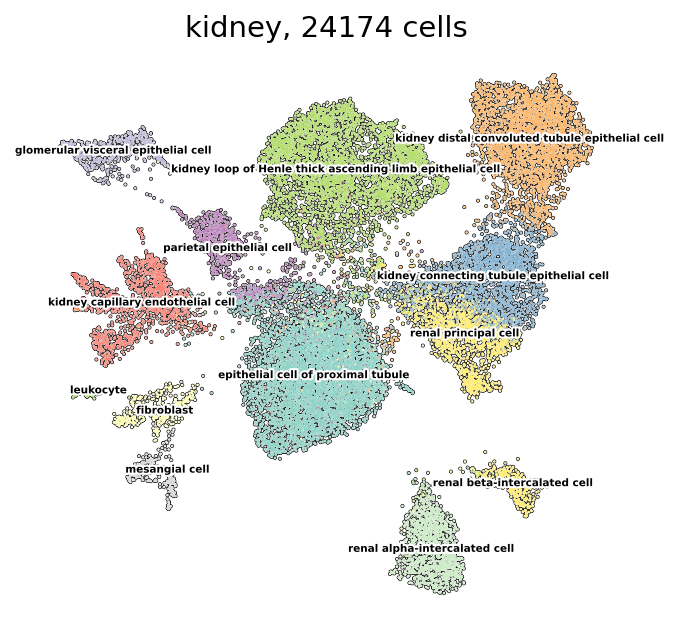

In [76]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata_fil, color="C_scANVI", add_outline=True, legend_loc='on data',
               legend_fontsize=5, legend_fontoutline=2,frameon=False,
               title= f'{tissue}, {n_cells} cells', palette='Set3')

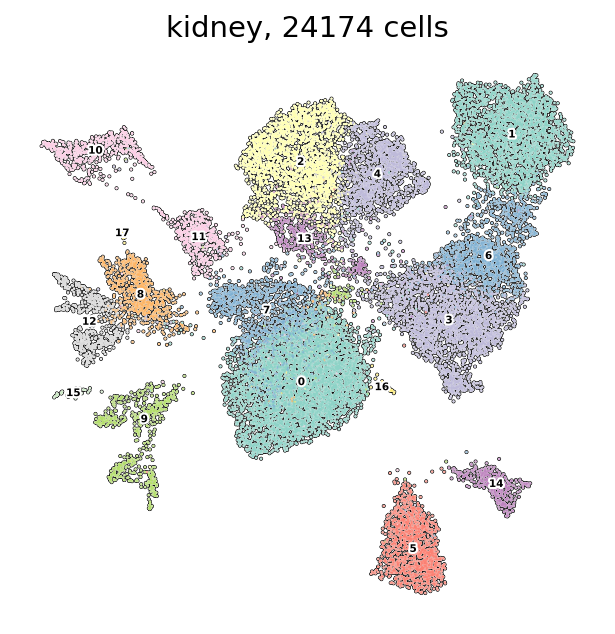

In [92]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata_fil, color="leiden", add_outline=True, legend_loc='on data',
               legend_fontsize=5, legend_fontoutline=2,frameon=False,
               title= f'{tissue}, {n_cells} cells', palette='Set3')

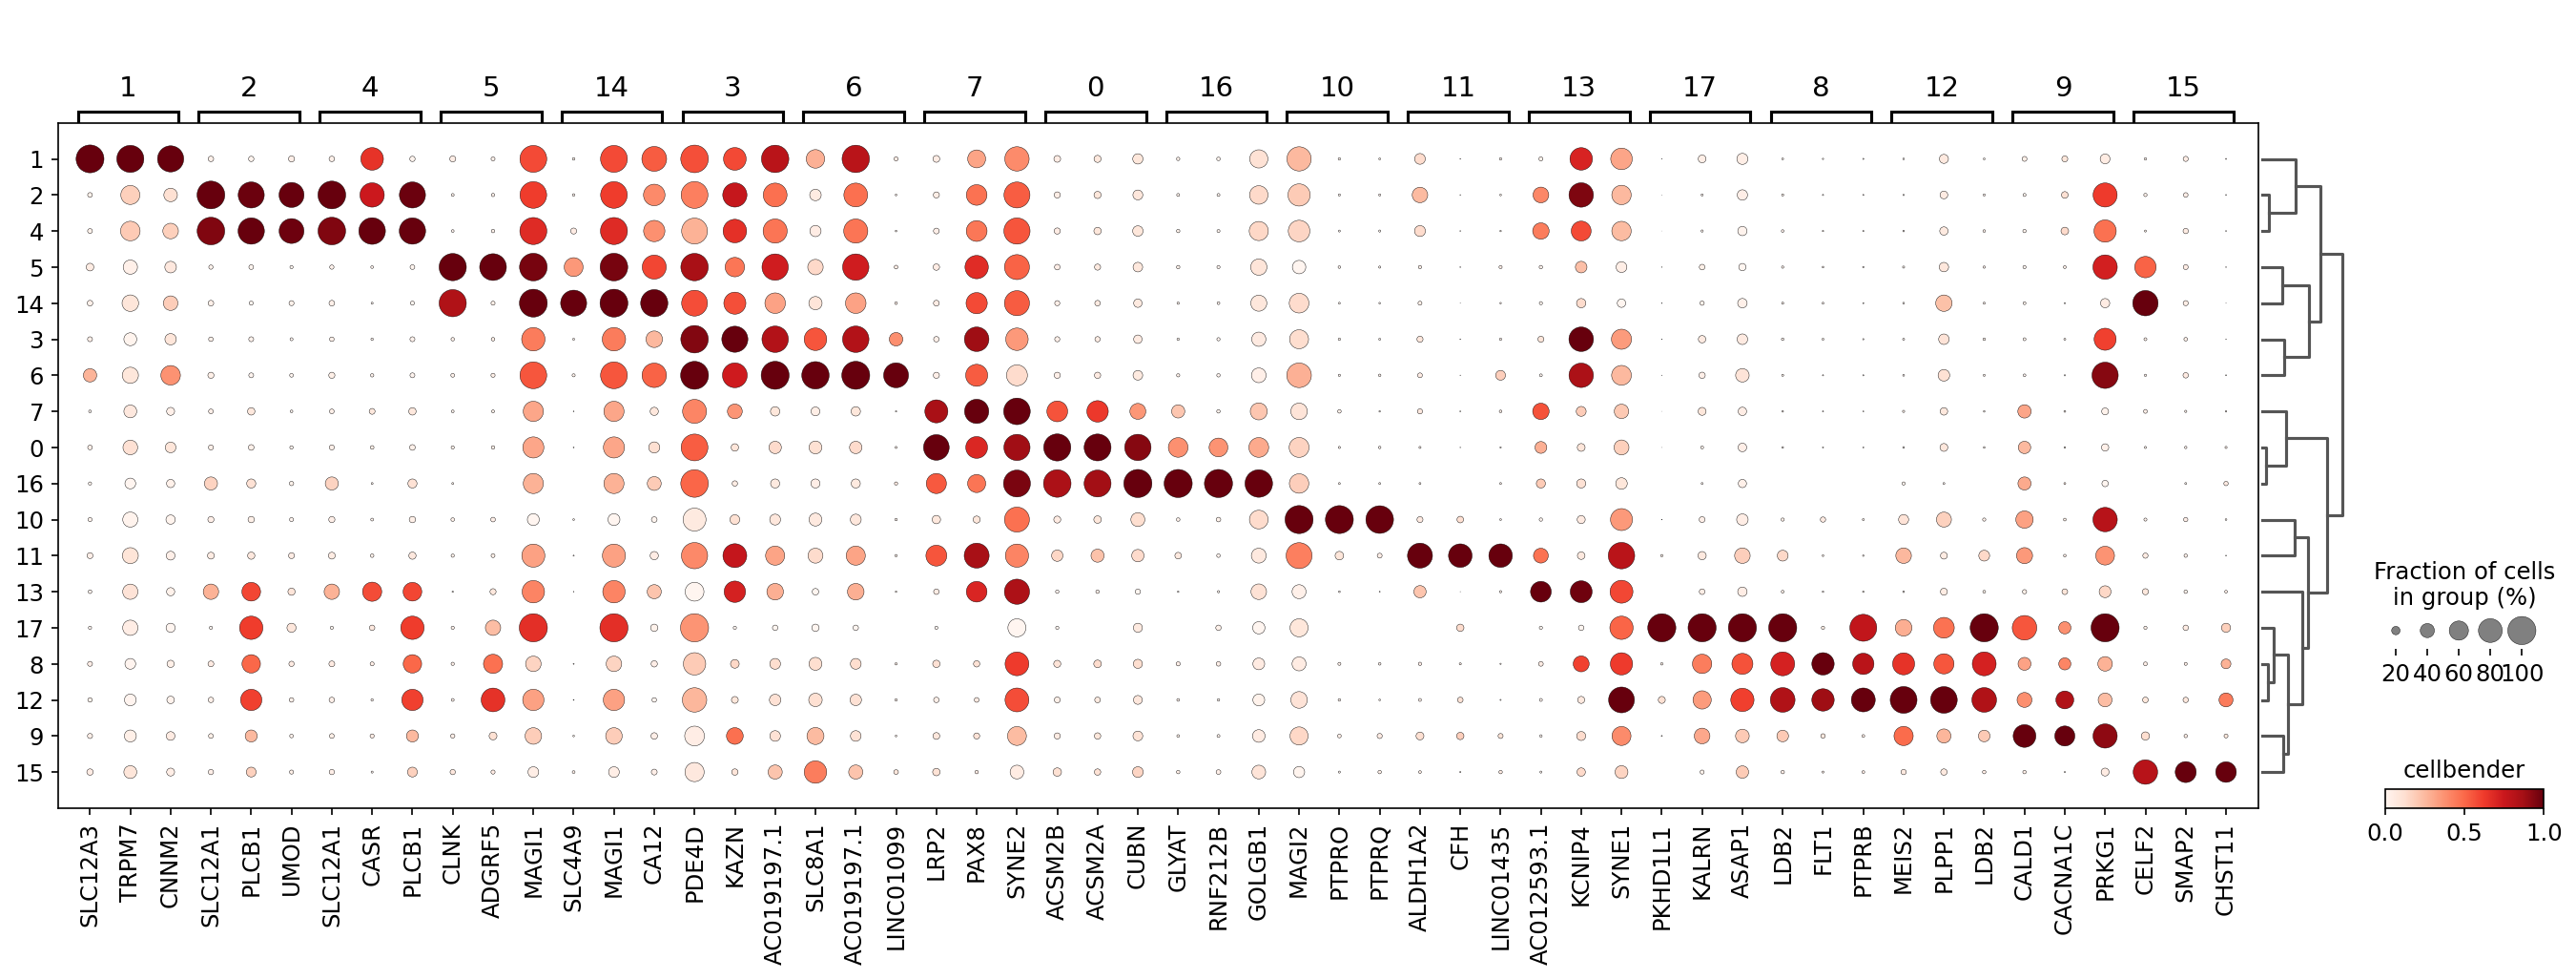

In [73]:
sc.pl.rank_genes_groups_dotplot(adata_fil,n_genes=3, standard_scale='var', colorbar_title='cellbender')

Select the top expressed genes in the contaminated clusters

In [77]:
tissue_objects_path= '/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/kidney'
adata.write(f'{tissue_objects_path}/{tissue}_cellbender_scanvi.h5ad')

# Integrate after official annotations
Oct 27th 2021 <br>
Execute from here if using the main CTA object (with final annotations and metadata for all tissues) <br>
**Note:** this object includes cell type annotations transfer from the Kidney atlas using the previous sections of this notebook. If you want to re-annotate the object, run the notebook from the beginning. 

In [15]:

# Folder with all tissues and individual objects (final versions Oct 2021)
tissue_objects_path  = '/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/'
# Read kidney 
file_covid_tissue =f'{tissue_objects_path}kidney_CTA_only.h5ad'

adata_covid = sc.read_h5ad(file_covid_tissue)

In [16]:
adata_covid.obs.head() 

cell_type_annotation  \
index                                                                       
S02_CAACAACAGGAACGTC-1                 epithelial cell of proximal tubule   
S02_CACTGAACACTGGACC-1                 epithelial cell of proximal tubule   
S02_TTCCTTCCAAACCATC-1                               renal principal cell   
S02_CTCCATGGTTGGTGTT-1  kidney loop of henle thick ascending limb epit...   
S02_CTACATTAGCCTATCA-1                               renal principal cell   

                       sample_origin 10X_run leiden disease_status  tissue  \
index                                                                        
S02_CAACAACAGGAACGTC-1    S02_kidney     S02     20          Cov19  kidney   
S02_CACTGAACACTGGACC-1    S02_kidney     S02     20          Cov19  kidney   
S02_TTCCTTCCAAACCATC-1    S02_kidney     S02     17          Cov19  kidney   
S02_CTCCATGGTTGGTGTT-1    S02_kidney     S02     17          Cov19  kidney   
S02_CTACATTAGCCTATCA-1    S02_kidney     S02     17          Cov19  kidney   

                       batch   race  age    source sex  \
index                                                    
S02_CAACAACAGGAACGTC-1     0  White   74  Saarland   F   
S02_CACTGAACACTGGACC-1     0  White   74  Saarland   F   
S02_TTCCTTCCAAACCATC-1     0  White   74  Saarland   F   
S02_CTCCATGGTTGGTGTT-1     0  White   74  Saarland   F   
S02_CTACATTAGCCTATCA-1     0  White   74  Saarland   F   

                        test_positive_hrs_before_death  cell_class  \
index                                                                
S02_CAACAACAGGAACGTC-1                            24.0  epithelial   
S02_CACTGAACACTGGACC-1                            24.0  epithelial   
S02_TTCCTTCCAAACCATC-1                            24.0  epithelial   
S02_CTCCATGGTTGGTGTT-1                            24.0  epithelial   
S02_CTACATTAGCCTATCA-1                            24.0  epithelial   

                                                      cell_ontology_class  
index                                                                      
S02_CAACAACAGGAACGTC-1                 epithelial cell of proximal tubule  
S02_CACTGAACACTGGACC-1                 epithelial cell of proximal tubule  
S02_TTCCTTCCAAACCATC-1                               renal principal cell  
S02_CTCCATGGTTGGTGTT-1  kidney loop of henle thick ascending limb epit...  
S02_CTACATTAGCCTATCA-1                               renal principal cell

We now just need to integrate with Kidney atlas using SCVI -- no label transfer is needed. 
Make sure to keep the same obs columns as in the CTA object for compatibility. This object will only be used for DE analysis

In [17]:
# add columns to kidney atlas 

adata.obs['disease_status'] ="Control"
adata.obs['10X_run'] = adata.obs['donor_uuid']
adata.obs['source'] = 'kidney_atlas'


In [26]:
# for SCVI

adata.layers['counts'] = adata.X 

Rename columns from the kidney atlas 

In [27]:
adata.obs = adata.obs.rename(columns={'cell_type':'cell_type_annotation'})
adata.obs = adata.obs.rename(columns={'source':'dataset'})
adata.obs = adata.obs.rename(columns={'donor_age':'age'})
adata.obs = adata.obs.rename(columns={'ethnicity':'race'})

In [30]:
adata_covid.obs['dataset'] = 'CTA'

Concatenate objects preserving common columns 

In [31]:
kidney = concat_2anndata(adata, adata_covid)

In [32]:
kidney.obs.head() 

10X_run            tissue  \
AAACCTGAGGGTCTCC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGAGTGTTAGA-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGCAAGCGCTC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGCACCAGATT-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGCAGTCAGAG-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   

                        race       age   sex       dataset  \
AAACCTGAGGGTCTCC-1  European  54 years  male  kidney_atlas   
AAACCTGAGTGTTAGA-1  European  54 years  male  kidney_atlas   
AAACCTGCAAGCGCTC-1  European  54 years  male  kidney_atlas   
AAACCTGCACCAGATT-1  European  54 years  male  kidney_atlas   
AAACCTGCAGTCAGAG-1  European  54 years  male  kidney_atlas   

                                                 cell_type_annotation  \
AAACCTGAGGGTCTCC-1                               renal principal cell   
AAACCTGAGTGTTAGA-1                 epithelial cell of proximal tubule   
AAACCTGCAAGCGCTC-1  kidney loop of Henle thick ascending limb epit...   
AAACCTGCACCAGATT-1  kidney loop of Henle thick ascending limb epit...   
AAACCTGCAGTCAGAG-1                 epithelial cell of proximal tubule   

                   disease_status batch  
AAACCTGAGGGTCTCC-1        Control     0  
AAACCTGAGTGTTAGA-1        Control     0  
AAACCTGCAAGCGCTC-1        Control     0  
AAACCTGCACCAGATT-1        Control     0  
AAACCTGCAGTCAGAG-1        Control     0

Integrate with SCVI 

In [33]:
kidney.layers['counts'] = kidney.X

In [34]:
#SCVI preprocessing
# normalize data
adata = kidney.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe

# For batch correction: Filter samples that have less than 200 cells
sample_id = '10X_run' 
sample_size = adata.obs[sample_id].value_counts()
large_samples = sample_size[sample_size>200].reset_index()['index'].astype(str)

adata = adata[adata.obs[sample_id].isin(large_samples)].copy()

normalizing counts per cell
    finished (0:00:00)


In [36]:
# Train SCVI
import scvi

n_layers=2
n_latent=100
scvi.data.setup_anndata(adata, layer="counts", batch_key=sample_id)
vae = scvi.model.SCVI(adata, n_layers=n_layers, n_latent=n_latent)

# takes about 40 min
vae.train()

adata.obsm["X_scVI"] = vae.get_latent_representation() 

INFO     Using batches from adata.obs["10X_run"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 24046 cells, 33514 vars, 10       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 333/333: 100%|██████████| 333/333 [18:02<00:00,  3.25s/it, loss=4.54e+03, v_num=1]


In [37]:
adata = utils.compute_neighbors(adata, use_rep='X_scVI')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


In [39]:
adata.obs["cell_type_annotation"].value_counts() 


epithelial cell of proximal tubule                           6676
kidney loop of Henle thick ascending limb epithelial cell    4435
kidney distal convoluted tubule epithelial cell              3315
kidney connecting tubule epithelial cell                     2244
renal principal cell                                         1542
renal alpha-intercalated cell                                1477
kidney capillary endothelial cell                            1008
parietal epithelial cell                                      683
glomerular visceral epithelial cell                           611
renal beta-intercalated cell                                  456
endothelial                                                   424
kidney loop of henle thick ascending limb epithelial cell     400
fibroblast                                                    387
mesangial cell                                                289
leukocyte                                                      99
Name: cell

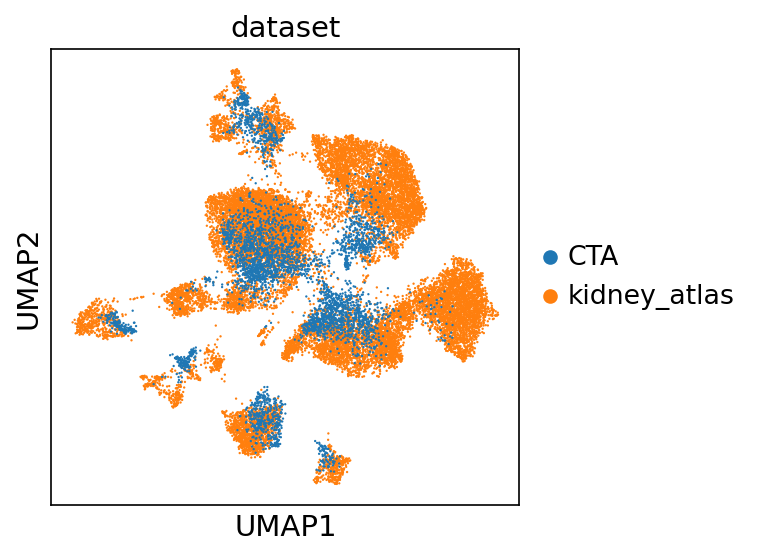

In [40]:
sc.pl.umap(adata, color ='dataset')

Change the name of endothelia cells to match that of the kidney atlas 

In [51]:
adata.obs.loc[adata.obs.cell_type_annotation == 'kidney capillary endothelial cell','cell_type_annotation']  = 'endothelial'

Since the kidney atlas has no cell_class annotation, we should here merge with the cell_class spreadsheet. Therefore, we need to keep names consistent with the spreadsheet. 

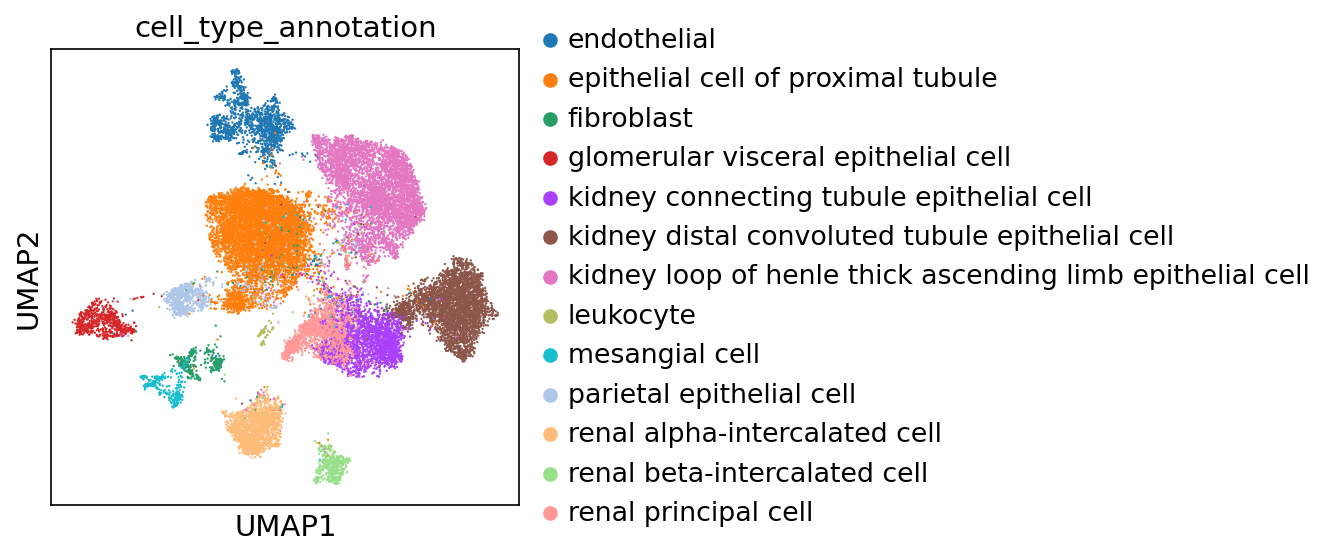

In [10]:
# now the object should be compatible with the current cell_class annotations
color_by ='cell_type_annotation'
sc.pl.umap(
    adata,
    color=[color_by]
)


In [56]:
adata.obs.head() 

10X_run            tissue  \
AAACCTGAGGGTCTCC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGAGTGTTAGA-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGCAAGCGCTC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGCACCAGATT-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   
AAACCTGCAGTCAGAG-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  cortex of kidney   

                        race       age   sex       dataset  \
AAACCTGAGGGTCTCC-1  European  54 years  male  kidney_atlas   
AAACCTGAGTGTTAGA-1  European  54 years  male  kidney_atlas   
AAACCTGCAAGCGCTC-1  European  54 years  male  kidney_atlas   
AAACCTGCACCAGATT-1  European  54 years  male  kidney_atlas   
AAACCTGCAGTCAGAG-1  European  54 years  male  kidney_atlas   

                                                 cell_type_annotation  \
AAACCTGAGGGTCTCC-1                               renal principal cell   
AAACCTGAGTGTTAGA-1                 epithelial cell of proximal tubule   
AAACCTGCAAGCGCTC-1  kidney loop of Henle thick ascending limb epit...   
AAACCTGCACCAGATT-1  kidney loop of Henle thick ascending limb epit...   
AAACCTGCAGTCAGAG-1                 epithelial cell of proximal tubule   

                   disease_status batch  _scvi_batch  _scvi_labels  \
AAACCTGAGGGTCTCC-1        Control     0            8             0   
AAACCTGAGTGTTAGA-1        Control     0            8             0   
AAACCTGCAAGCGCTC-1        Control     0            8             0   
AAACCTGCACCAGATT-1        Control     0            8             0   
AAACCTGCAGTCAGAG-1        Control     0            8             0   

                    _scvi_local_l_mean  _scvi_local_l_var leiden  
AAACCTGAGGGTCTCC-1             8.64802           0.431709      3  
AAACCTGAGTGTTAGA-1             8.64802           0.431709      0  
AAACCTGCAAGCGCTC-1             8.64802           0.431709      2  
AAACCTGCACCAGATT-1             8.64802           0.431709      2  
AAACCTGCAGTCAGAG-1             8.64802           0.431709      0

Merge with cell_class and cell_onotolgy

In [57]:
meta_dir = '/mnt/ibm_lg/covid_tissue_atlas/data/metadata/'
cell_meta = pd.read_csv(meta_dir + 'CTA_Cell_Ontology_Map - Sheet1.csv')

cell_meta = cell_meta[['cell_type_annotation','cell_class','cell_ontology_class','tissue']]
cell_meta.head()

cell_type_annotation   cell_class  \
0                            endothelial  endothelial   
1  other immune (cd8 t-cell or monocyte)       immune   
2                             macrophage   macrophage   
3                    cardiac muscle cell       muscle   
4                                neurons     neuronal   

        cell_ontology_class tissue  
0  cardiac endothelial cell  heart  
1                 leukocyte  heart  
2                macrophage  heart  
3       cardiac muscle cell  heart  
4            cardiac neuron  heart

In [63]:
adata.obs['tissue'] = 'kidney'
adata.obs['cell_type_annotation'] = adata.obs['cell_type_annotation'].str.lower() 

In [64]:
new_df = pd.merge(adata.obs, cell_meta,  how='left', 
                  left_on=['tissue','cell_type_annotation'], 
                  right_on = ['tissue','cell_type_annotation'])
new_df.head()

10X_run  tissue      race       age   sex  \
0  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European  54 years  male   
1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European  54 years  male   
2  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European  54 years  male   
3  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European  54 years  male   
4  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European  54 years  male   

        dataset                               cell_type_annotation  \
0  kidney_atlas                               renal principal cell   
1  kidney_atlas                 epithelial cell of proximal tubule   
2  kidney_atlas  kidney loop of henle thick ascending limb epit...   
3  kidney_atlas  kidney loop of henle thick ascending limb epit...   
4  kidney_atlas                 epithelial cell of proximal tubule   

  disease_status batch  _scvi_batch  _scvi_labels  _scvi_local_l_mean  \
0        Control     0            8             0             8.64802   
1        Control     0            8             0             8.64802   
2        Control     0            8             0             8.64802   
3        Control     0            8             0             8.64802   
4        Control     0            8             0             8.64802   

   _scvi_local_l_var leiden  cell_class  \
0           0.431709      3  epithelial   
1           0.431709      0  epithelial   
2           0.431709      2  epithelial   
3           0.431709      2  epithelial   
4           0.431709      0  epithelial   

                                 cell_ontology_class  
0                               renal principal cell  
1                 epithelial cell of proximal tubule  
2  kidney loop of henle thick ascending limb epit...  
3  kidney loop of henle thick ascending limb epit...  
4                 epithelial cell of proximal tubule

<AxesSubplot:xlabel='dataset,cell_class'>

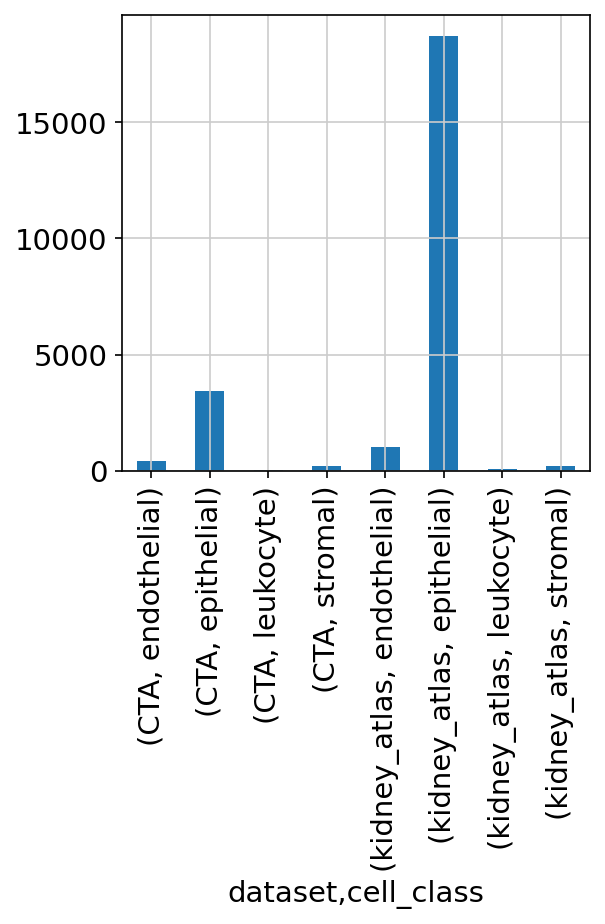

In [68]:
new_df.groupby(['dataset', 'cell_class']).size().plot(kind = "bar")

In [66]:
# merge with the actual adata object
adata.obs.reset_index(inplace = True)
adata.obs['cell_class'] = new_df['cell_class']
adata.obs.set_index('index', inplace = True)

In [67]:
# final metadata 
adata.obs.head() 

10X_run  tissue      race  \
index                                                                        
AAACCTGAGGGTCTCC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGAGTGTTAGA-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCAAGCGCTC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCACCAGATT-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCAGTCAGAG-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   

                         age   sex       dataset  \
index                                              
AAACCTGAGGGTCTCC-1  54 years  male  kidney_atlas   
AAACCTGAGTGTTAGA-1  54 years  male  kidney_atlas   
AAACCTGCAAGCGCTC-1  54 years  male  kidney_atlas   
AAACCTGCACCAGATT-1  54 years  male  kidney_atlas   
AAACCTGCAGTCAGAG-1  54 years  male  kidney_atlas   

                                                 cell_type_annotation  \
index                                                                   
AAACCTGAGGGTCTCC-1                               renal principal cell   
AAACCTGAGTGTTAGA-1                 epithelial cell of proximal tubule   
AAACCTGCAAGCGCTC-1  kidney loop of henle thick ascending limb epit...   
AAACCTGCACCAGATT-1  kidney loop of henle thick ascending limb epit...   
AAACCTGCAGTCAGAG-1                 epithelial cell of proximal tubule   

                   disease_status batch  _scvi_batch  _scvi_labels  \
index                                                                
AAACCTGAGGGTCTCC-1        Control     0            8             0   
AAACCTGAGTGTTAGA-1        Control     0            8             0   
AAACCTGCAAGCGCTC-1        Control     0            8             0   
AAACCTGCACCAGATT-1        Control     0            8             0   
AAACCTGCAGTCAGAG-1        Control     0            8             0   

                    _scvi_local_l_mean  _scvi_local_l_var leiden  cell_class  
index                                                                         
AAACCTGAGGGTCTCC-1             8.64802           0.431709      3  epithelial  
AAACCTGAGTGTTAGA-1             8.64802           0.431709      0  epithelial  
AAACCTGCAAGCGCTC-1             8.64802           0.431709      2  epithelial  
AAACCTGCACCAGATT-1             8.64802           0.431709      2  epithelial  
AAACCTGCAGTCAGAG-1             8.64802           0.431709      0  epithelial

In [70]:
col_labs = [lab for lab in list(adata.obs.keys()) if '_scvi' in lab]
for col in col_labs:
    del(adata.obs[col])

10X_run  tissue      race  \
index                                                                        
AAACCTGAGGGTCTCC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGAGTGTTAGA-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCAAGCGCTC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCACCAGATT-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCAGTCAGAG-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   

                         age   sex       dataset  \
index                                              
AAACCTGAGGGTCTCC-1  54 years  male  kidney_atlas   
AAACCTGAGTGTTAGA-1  54 years  male  kidney_atlas   
AAACCTGCAAGCGCTC-1  54 years  male  kidney_atlas   
AAACCTGCACCAGATT-1  54 years  male  kidney_atlas   
AAACCTGCAGTCAGAG-1  54 years  male  kidney_atlas   

                                                 cell_type_annotation  \
index                                                                   
AAACCTGAGGGTCTCC-1                               renal principal cell   
AAACCTGAGTGTTAGA-1                 epithelial cell of proximal tubule   
AAACCTGCAAGCGCTC-1  kidney loop of henle thick ascending limb epit...   
AAACCTGCACCAGATT-1  kidney loop of henle thick ascending limb epit...   
AAACCTGCAGTCAGAG-1                 epithelial cell of proximal tubule   

                   disease_status batch leiden  cell_class  
index                                                       
AAACCTGAGGGTCTCC-1        Control     0      3  epithelial  
AAACCTGAGTGTTAGA-1        Control     0      0  epithelial  
AAACCTGCAAGCGCTC-1        Control     0      2  epithelial  
AAACCTGCACCAGATT-1        Control     0      2  epithelial  
AAACCTGCAGTCAGAG-1        Control     0      0  epithelial

In [73]:
adata.obs.head() 

10X_run  tissue      race  \
index                                                                        
AAACCTGAGGGTCTCC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGAGTGTTAGA-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCAAGCGCTC-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCACCAGATT-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   
AAACCTGCAGTCAGAG-1  e0def004-9e30-4a3b-9a65-007110f3a1f2  kidney  European   

                         age   sex       dataset  \
index                                              
AAACCTGAGGGTCTCC-1  54 years  male  kidney_atlas   
AAACCTGAGTGTTAGA-1  54 years  male  kidney_atlas   
AAACCTGCAAGCGCTC-1  54 years  male  kidney_atlas   
AAACCTGCACCAGATT-1  54 years  male  kidney_atlas   
AAACCTGCAGTCAGAG-1  54 years  male  kidney_atlas   

                                                 cell_type_annotation  \
index                                                                   
AAACCTGAGGGTCTCC-1                               renal principal cell   
AAACCTGAGTGTTAGA-1                 epithelial cell of proximal tubule   
AAACCTGCAAGCGCTC-1  kidney loop of henle thick ascending limb epit...   
AAACCTGCACCAGATT-1  kidney loop of henle thick ascending limb epit...   
AAACCTGCAGTCAGAG-1                 epithelial cell of proximal tubule   

                   disease_status batch leiden  cell_class  
index                                                       
AAACCTGAGGGTCTCC-1        Control     0      3  epithelial  
AAACCTGAGTGTTAGA-1        Control     0      0  epithelial  
AAACCTGCAAGCGCTC-1        Control     0      2  epithelial  
AAACCTGCACCAGATT-1        Control     0      2  epithelial  
AAACCTGCAGTCAGAG-1        Control     0      0  epithelial

Fix the difference in age format 

In [77]:
adata.obs.age.astype = adata.obs.age.astype(str)

In [95]:
adata.obs.loc[adata.obs.dataset =='kidney_atlas','age'] = adata.obs[adata.obs.dataset =='kidney_atlas'].age.str.split(' ', expand = True)[0]

In [97]:
adata.obs.age = adata.obs.age.astype(int)

So now the object is integrated and has cell_type_annotation and cell_class for all cells. We can export! 

In [98]:
adata.write('/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/kidney_CTA_KA_integrated.h5ad')

In [6]:
adata = sc.read_h5ad('/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/kidney/kidney_CTA_KA_integrated.h5ad')

/data/alejandro/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Manuscript Figures 
Apr 2022 <br>
* Kidney UMAP colored by dataset
* Kidney UMAP colored by cell type

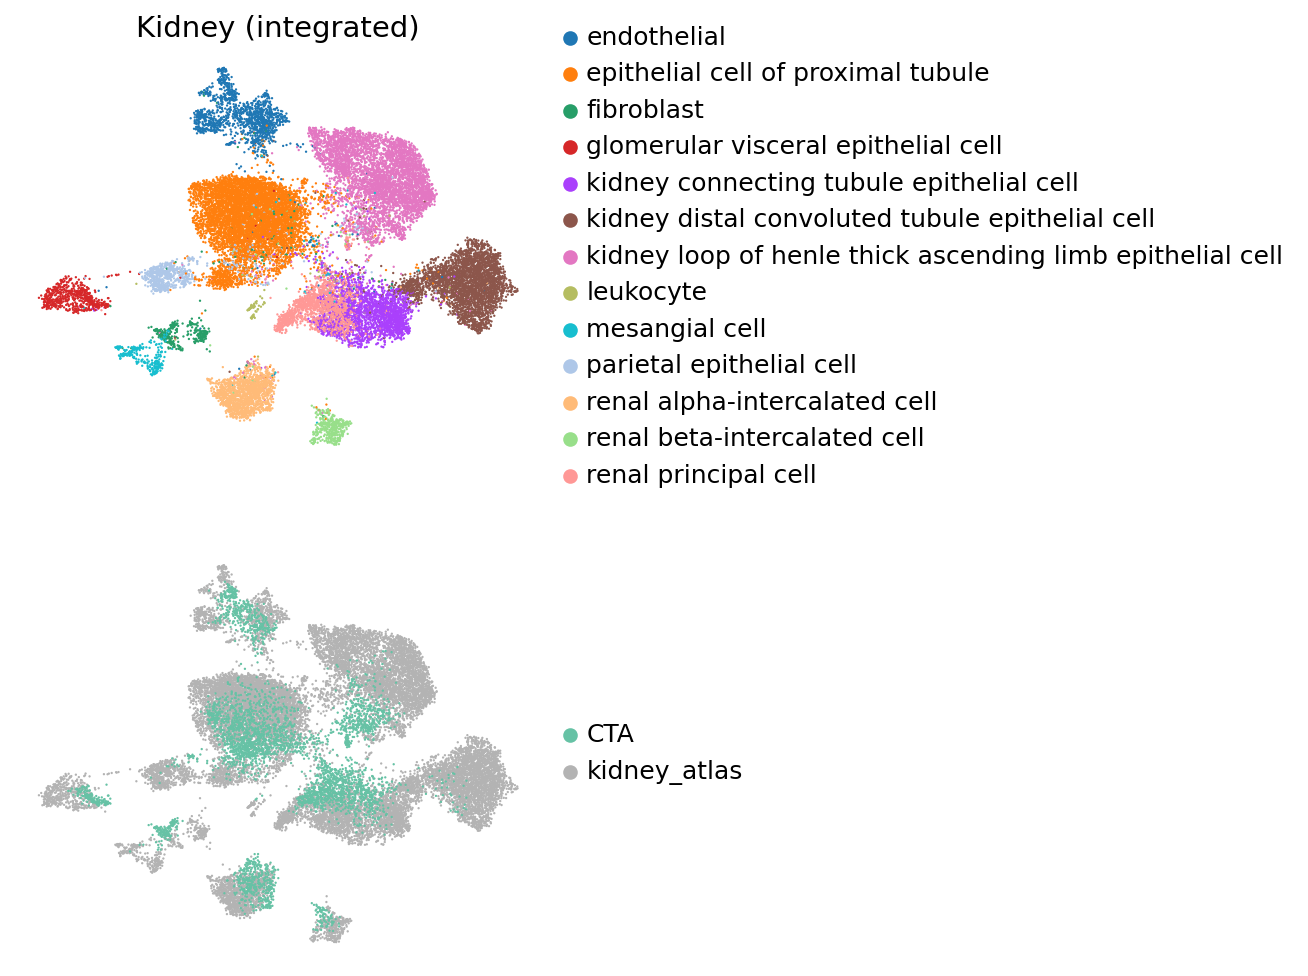

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4.5,8))



sc.pl.umap(adata, color='cell_type_annotation', add_outline=False, legend_loc='right margin',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='Kidney (integrated)', 
               ax=ax[0], show = False)
    
sc.pl.umap(adata, color='dataset', add_outline=False, legend_loc='right margin',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='', palette='Set2',
               ax = ax[1], show = False)

plt.show() 




In [16]:
fig.savefig('SI_kidneyIntegration_UMAP.png', dpi=400, bbox_inches='tight', transparent=True)


In [14]:
pwd

'/mnt/ibm_lg/alejandro/covid-tissue-atlas/notebooks/tissue_optimization_notebooks'